# 데이터 불러오기 및 기본 전처리

# 새 섹션

In [13]:
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [11]:
from os import listdir
print(listdir('./Documents/github/[CodeStates]Section_01_Project/CodeStates_Section_Project/Section_1'))

['.ipynb_checkpoints', 'AI_장형준_Section1.ipynb', 'vgames2.csv']


In [23]:
import pandas as pd
# url='./Downloads/vgames2.csv'
local='./Documents/github/[CodeStates]Section_01_Project/CodeStates_Section_Project/Section_1/vgames2.csv'
dfraw = pd.read_csv(local, index_col='Unnamed: 0')
dfraw.info(), dfraw.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


(None, (16598, 9))

# 🕹️ Data Description
- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미 매출액입니다.
- EU_Sales : 유럽 매출액입니다.
- JP_Sales : 일본 매출액입니다.
- Other_Sales : 기타지역 매출액입니다.

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.  
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.  
- 매출이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.  
- 위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를  완성하세요.  

In [ ]:
dfraw.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [24]:
#기존의 데이터는 object형이므로, 연산을위해 실수형으로 형변환
def setSales(x):
    if x[-1]=='M':
        return float(x[:-1])
    elif x[-1]=='K':
        return float(x[:-1])*(0.001)
    else:
        return float(x)
sCols=['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
dfraw[sCols[0]] = dfraw.loc[:,sCols[0]].apply(lambda x : setSales(x))
dfraw[sCols[1]] = dfraw.loc[:,sCols[1]].apply(lambda x : setSales(x))
dfraw[sCols[2]] = dfraw.loc[:,sCols[2]].apply(lambda x : setSales(x))
dfraw[sCols[3]] = dfraw.loc[:,sCols[3]].apply(lambda x : setSales(x))

In [25]:
#4개지역의 매출량을 합하여, Total_Sales라는 feature 추가.
def totalSales(x):
    return x['NA_Sales'] + x['EU_Sales'] + x['JP_Sales']+ x['Other_Sales']
dfraw['Total_Sales']=dfraw.apply(lambda x : totalSales(x) , axis=1)
dfraw

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
# Genre 가 NaN 으로 따라오지 않은 데이터
dfraw.loc[dfraw.Genre.isnull()].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.00,0.02,0.50
1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.00,0.02,0.66
1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.00,0.04,0.00,0.57,0.61
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5.17,4.05,4.34,0.79,14.35
2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0.00,0.03,0.42
2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0.00,0.00,0.18
3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0.00,0.03,0.30
3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0.00,0.00,0.00,0.03
3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0.00,0.00,0.09


## 기초전처리
### 1. Year에 대한 처리  
- 2017년 이전의 데이터만 받도록하였다.

### 2. NaN 값에 대한 처리
- 해당 Feature의 빈도중앙값으로 대체하였다.

In [26]:
def year(x):
    if x<21: return x+2000
    elif x<100:return x+1900
    else: return x
dfraw.Year = dfraw.loc[:]['Year'].apply(lambda x : year(x))

In [27]:
#연도별 게임 Count 
# dffill 은 Null 값에 대하여, 해당 Feature 의 중앙값을 넣어주도록 하였다. 정확성을 위해서는 wikipedia의 api를 받아와서, 그것으로 다른피쳐들의 매칭을 확인하여
# 매핑해줘야겠지만 지금상황에서 그게 중요한게 아니라는 판단하에, 중앙값으로 대체하는거로 하였다. 

dffill = dfraw.loc[dfraw.Year<2017]
dffill['Year'].fillna(dffill['Year'].mode()[0], inplace=True)
dffill['Publisher'].fillna(dffill['Publisher'].mode()[0], inplace=True)
dffill['Genre'].fillna(dffill['Genre'].mode()[0], inplace=True)
dffill.isnull().sum()

C:\Users\hj\anaconda3\envs\DataScienceFAQ\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
Total_Sales    0
dtype: int64

In [18]:
#동일 이름의 다른 Platform에 출시한 게임이 여럿 있다
dfraw[dfraw.duplicated(subset='Name')].sort_values('Name').head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
8868,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.02
5505,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
9466,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0.00,0.01,0.13
6840,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.20,1.17
16281,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14,1.49


<AxesSubplot:xlabel='Year', ylabel='count'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


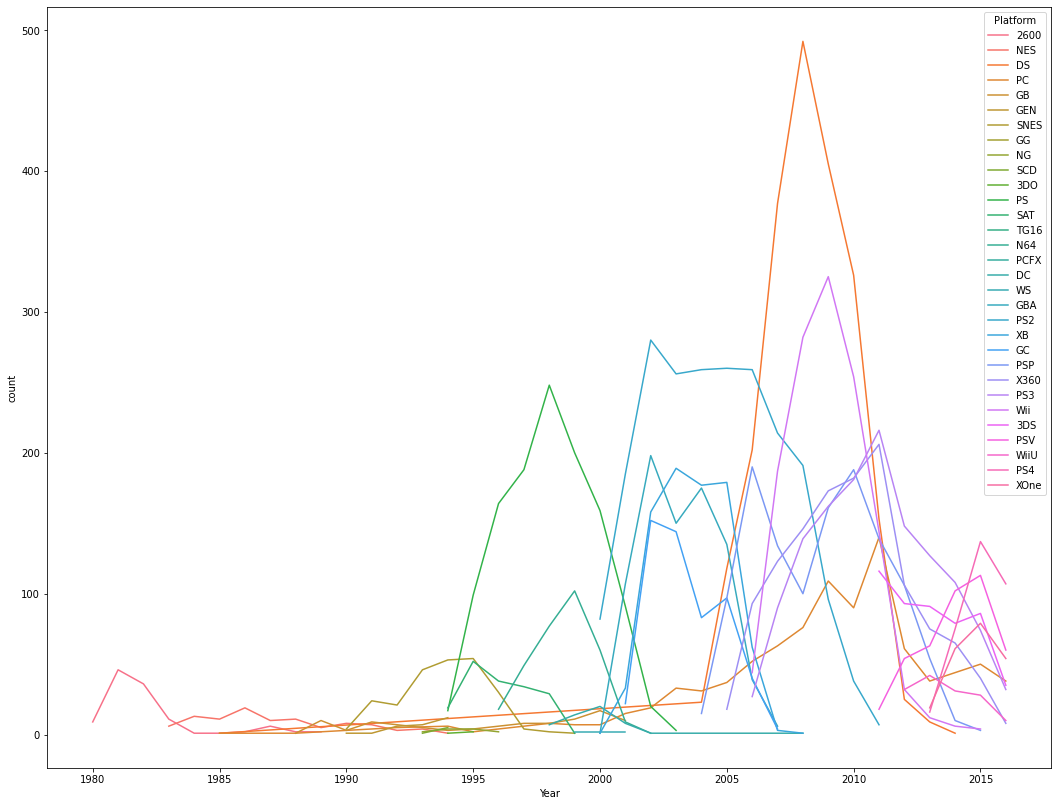

In [19]:
plt.figure(figsize=(18,14))
sns.lineplot(data=dffill.groupby(['Year','Platform']).describe()['Total_Sales'], x='Year',y='count',hue='Platform')

# Data에 대한 기초분석 (매출 높은 게임에 대한 분석)

## 회사별 출시량 Top 15th
닌텐도가 전체 기간 중 1위를 차지하였으며 그 뒤로 Take-Two Interactive, Sony Computer Entertainment가 뒤따랐습니다.

In [ ]:
top15Pub=list(dfraw.groupby(['Publisher']).count().sort_values('Name', ascending=False).head(15).index)
top15Pub

<AxesSubplot:xlabel='Total_Sales', ylabel='Publisher'>

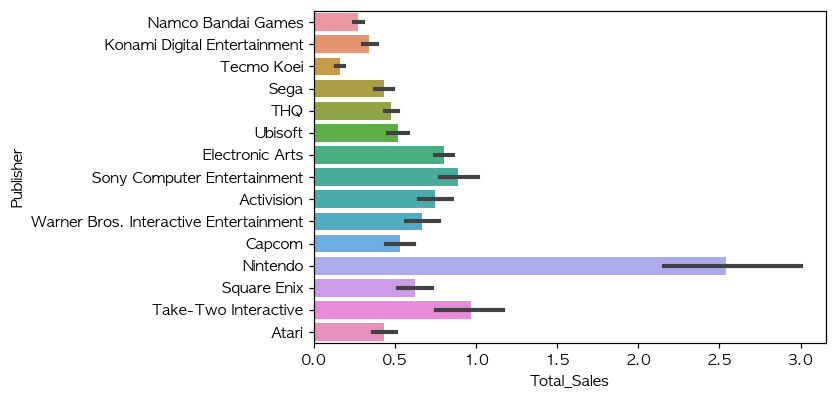

In [ ]:
def top15pub(x):
    if x in top15Pub:
        return True
    else: return False

df_top_15_Pub = dfraw[ dfraw.Publisher.apply(lambda x : top15pub(x)) ]
sns.barplot(data = df_top_15_Pub, x='Total_Sales',y='Publisher')

## 연도별 게임 출시량 그래프
2010년을 전후로 최고점을 찍은 후, 하강함  
본 데이터셋에는 **PC와 모바일게임의 데이터가 없으므로**, 최근의 동향을 위해서는 최근 모바일게임과 PC게임의 데이터가 필요할 것으로 추측됨

<AxesSubplot:xlabel='Year'>

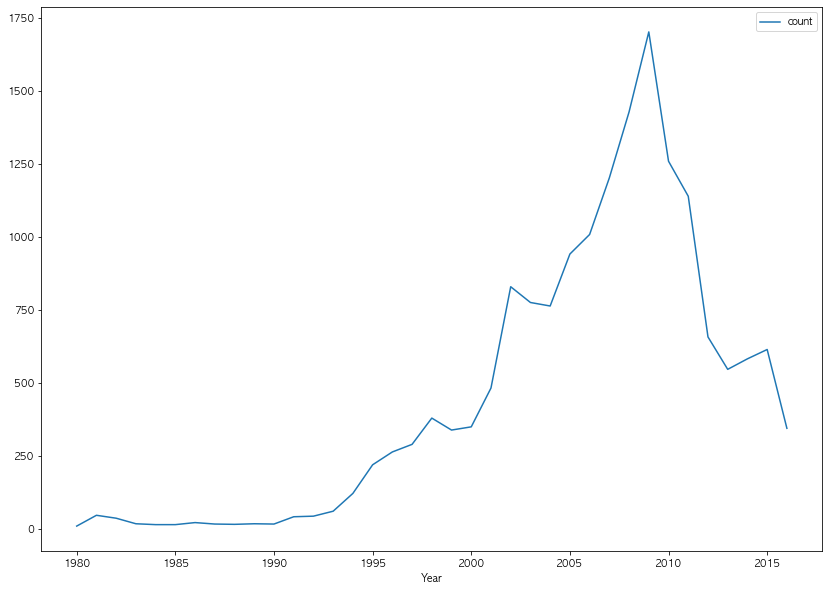

In [ ]:
dffill.groupby('Year').describe()['Total_Sales'].plot(y='count', figsize=(14,10))

## 통합년도 세계 매출 Top 15 Games
Nintendo의 제품들이 전부 차지하였으며, 위스포츠, 슈퍼마리오, 포켓몬, 테트리스가 뒤따랐으며,  
위스포츠는 대박히트작으로, 2위와 두 배에 가까운 세계 매출액을 기록하였습니다.

In [ ]:
#전체 가격 Top 15개
df_Total_Top_15 = dffill.sort_values('Total_Sales', ascending=False).head(15)
df_Total_Top_15

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1204,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


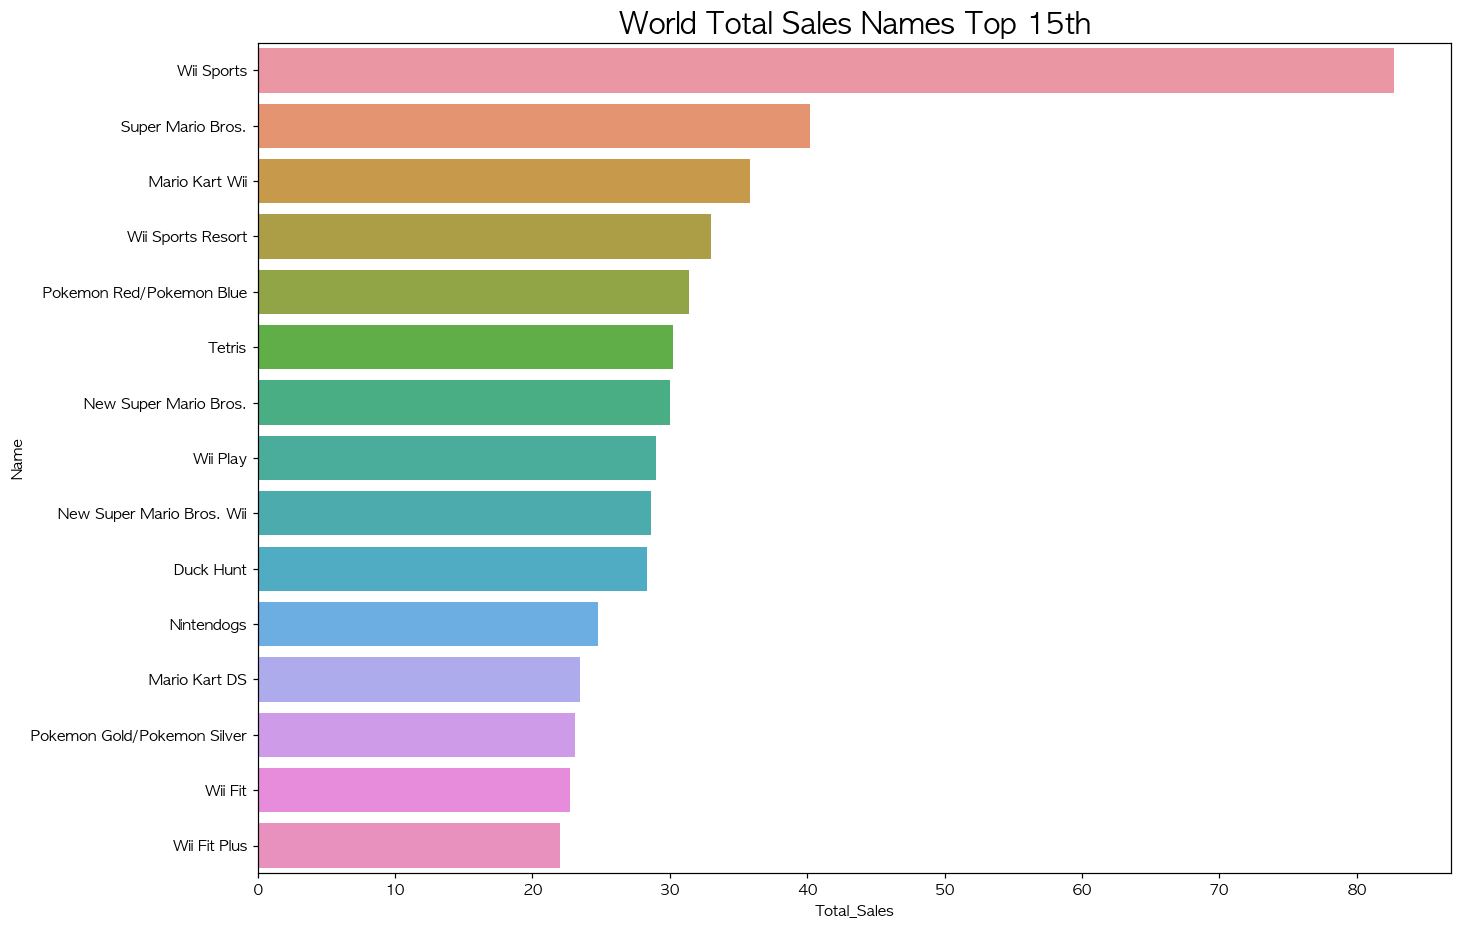

In [ ]:
plt.figure(figsize=(14,10), dpi=110)
# plt.xticks(rotation=90)
# plt.legend(labels=df_Total_Top_15['Genre'])
# plt.barh(data=df_Total_Top_15, y='Name',width='Total_Sales',)
plt.title("World Total Sales Names Top 15th", fontsize=19)
sns.barplot(data=df_Total_Top_15, x='Total_Sales',y='Name')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Total_Sales'>

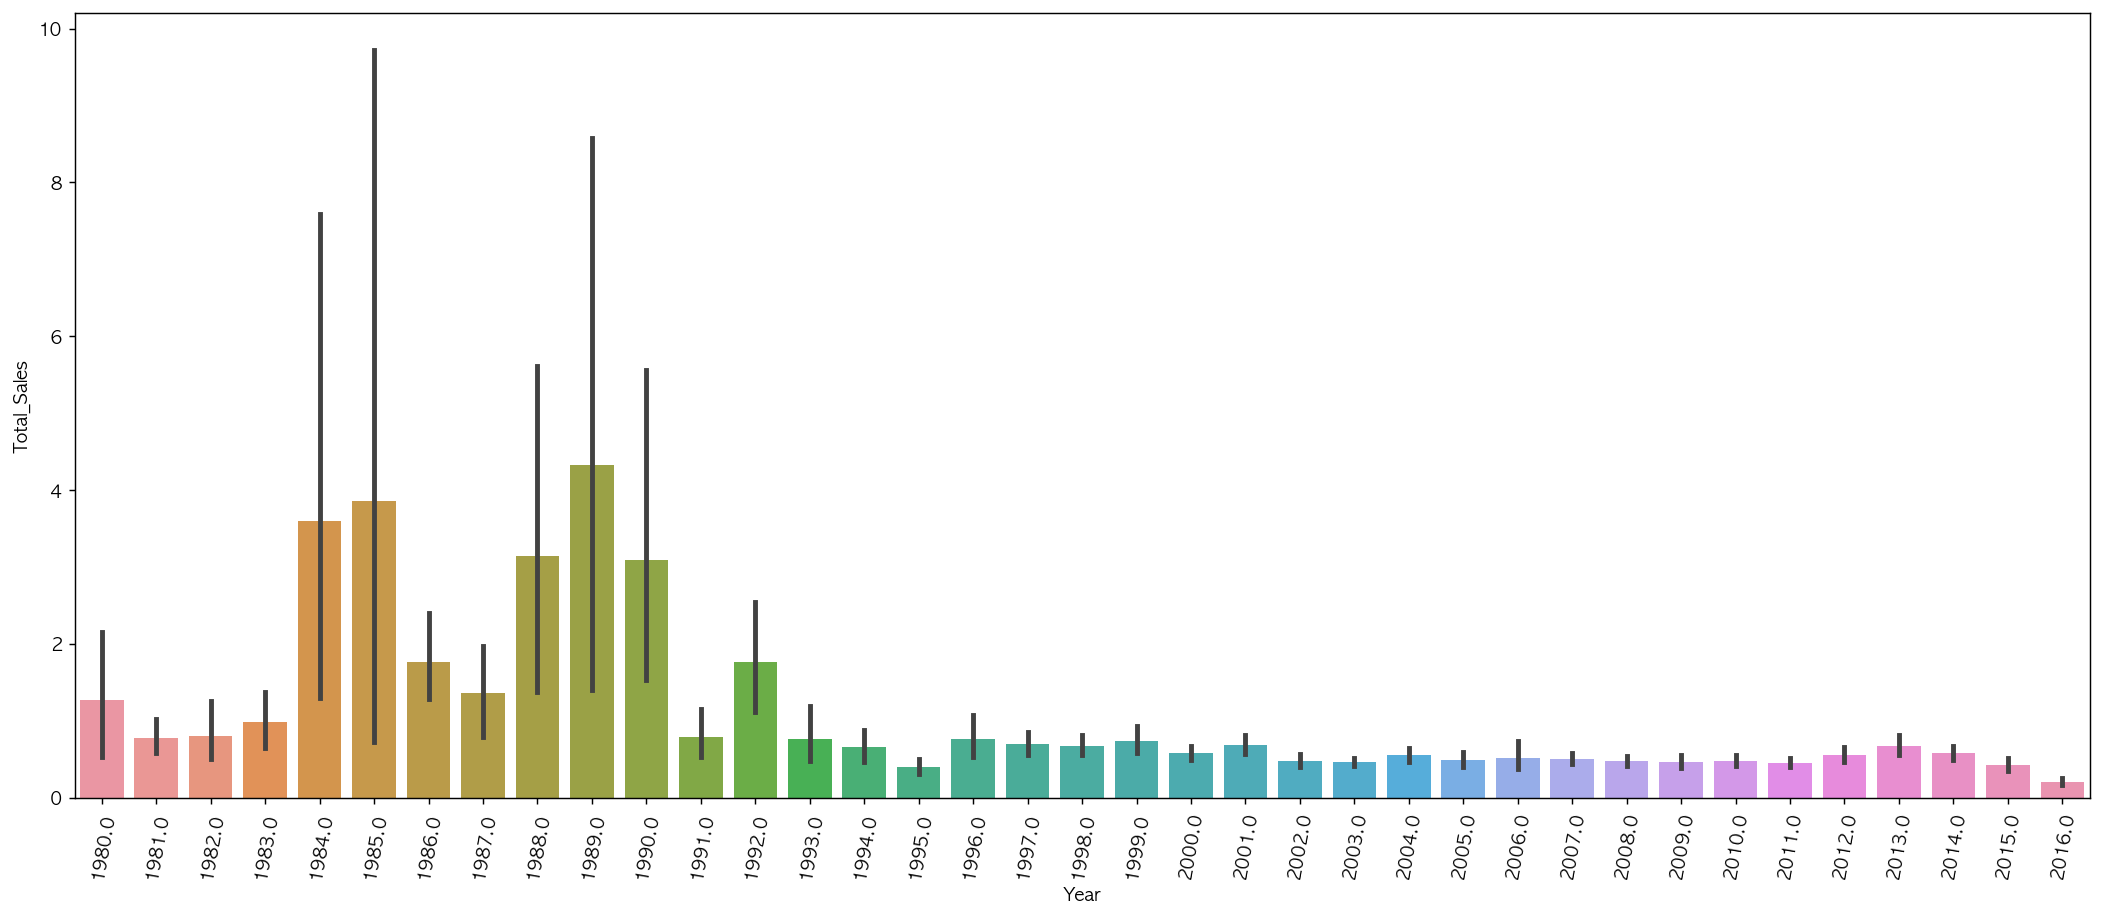

In [ ]:
plt.figure(figsize=(20,8), dpi=130)
plt.xticks(rotation=80)
sns.barplot(data=dffill, x='Year',y='Total_Sales')

## 통합년도 세계 매출 Top 15 Publisher
닌텐도가 압도적으로 1위를 하고, 그 뒤를 Electronic Arts , Activision이 따르고있다. 

<AxesSubplot:title={'center':'World Total Sales Top Publisher 15th'}, xlabel='Total_Sales', ylabel='Publisher'>

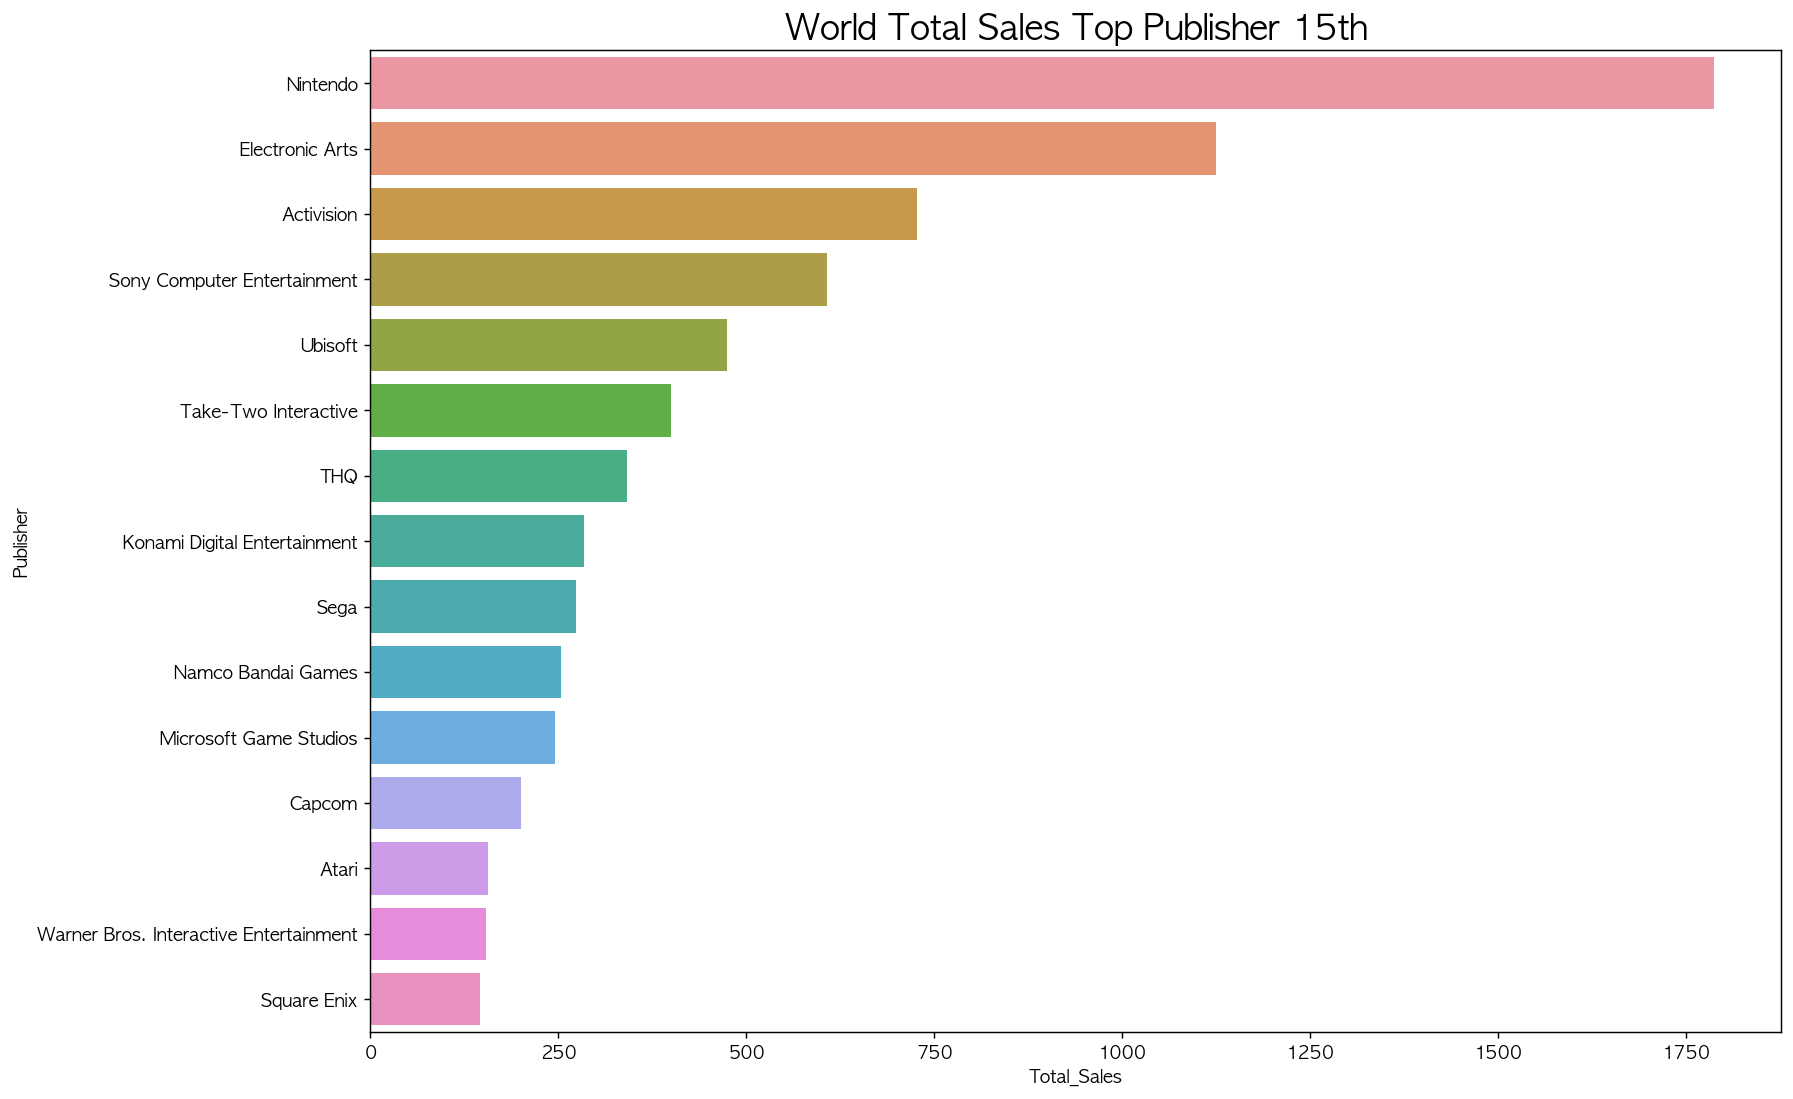

In [ ]:
df_Total_Year_Pub15=dffill.groupby(['Publisher']).agg('sum').sort_values('Total_Sales', ascending=False).head(15)
plt.figure(figsize=(14,10), dpi=130)
plt.title("World Total Sales Top Publisher 15th", fontsize=19)
sns.barplot(data=df_Total_Year_Pub15.reset_index(), x='Total_Sales', y='Publisher')

## 통합년도 세계 매출 Top 15 Platform
PS2가 1위를 하고, 그 뒤를 X360 , PS3가 따르고있다. 

<AxesSubplot:title={'center':'World Total Sales Top Platform 15th'}, xlabel='Total_Sales', ylabel='Platform'>

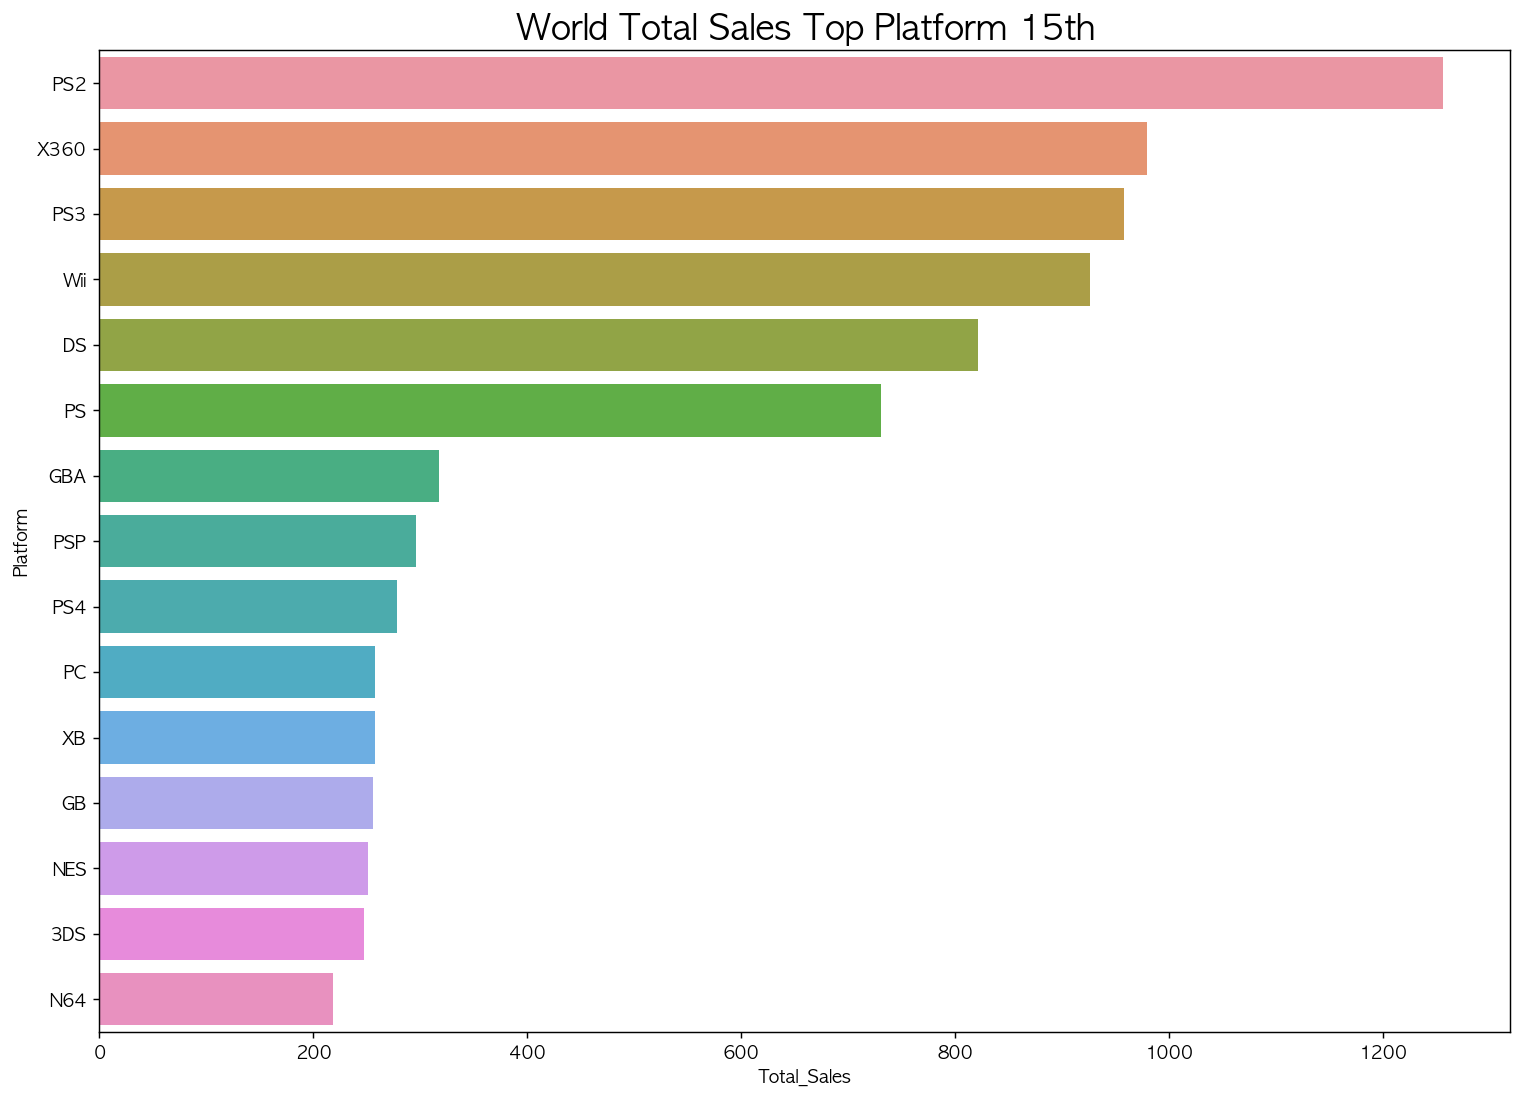

In [ ]:
df_Total_Year_Pub15=dffill.groupby(['Platform']).agg('sum').sort_values('Total_Sales', ascending=False).head(15)
plt.figure(figsize=(14,10), dpi=130)
plt.title("World Total Sales Top Platform 15th", fontsize=19)
sns.barplot(data=df_Total_Year_Pub15.reset_index(), x='Total_Sales', y='Platform')

## 통합년도 세계 매출 Genre 순위
Action이 1위, 스포츠, 슈팅(슈터) 롤플레잉, 플랫폼이 2,3,4,5등을 기록하였습니다.

<AxesSubplot:title={'center':'World Total Sales Top Genre 15th'}, xlabel='Total_Sales', ylabel='Genre'>

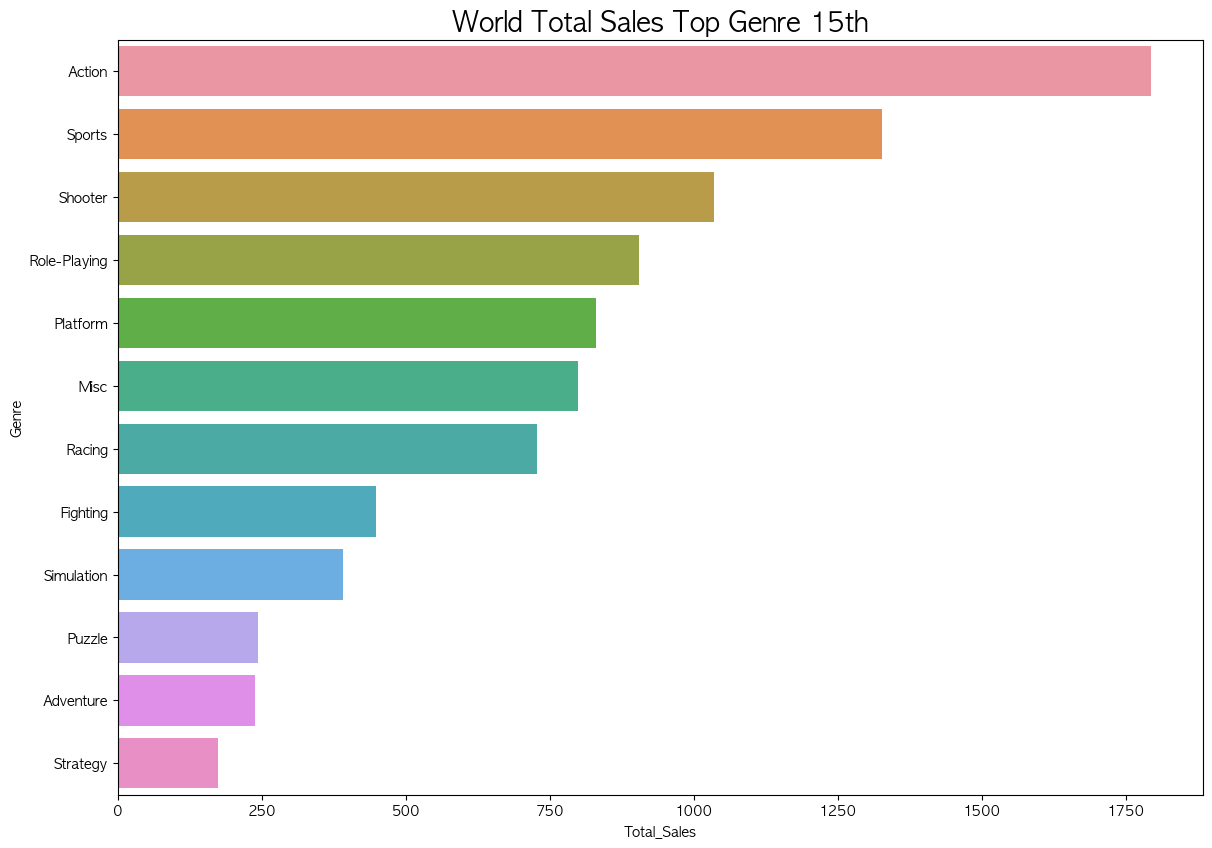

In [ ]:
df_Total_Year_Pub15=dffill.groupby(['Genre']).agg('sum').sort_values('Total_Sales', ascending=False).head(15)
plt.figure(figsize=(14,10), dpi=100)
plt.title("World Total Sales Top Genre 15th", fontsize=19)
sns.barplot(data=df_Total_Year_Pub15.reset_index(), x='Total_Sales', y='Genre')

## 연도- 지역별 매출액

### 북미

<AxesSubplot:xlabel='Year', ylabel='NA_Sales'>

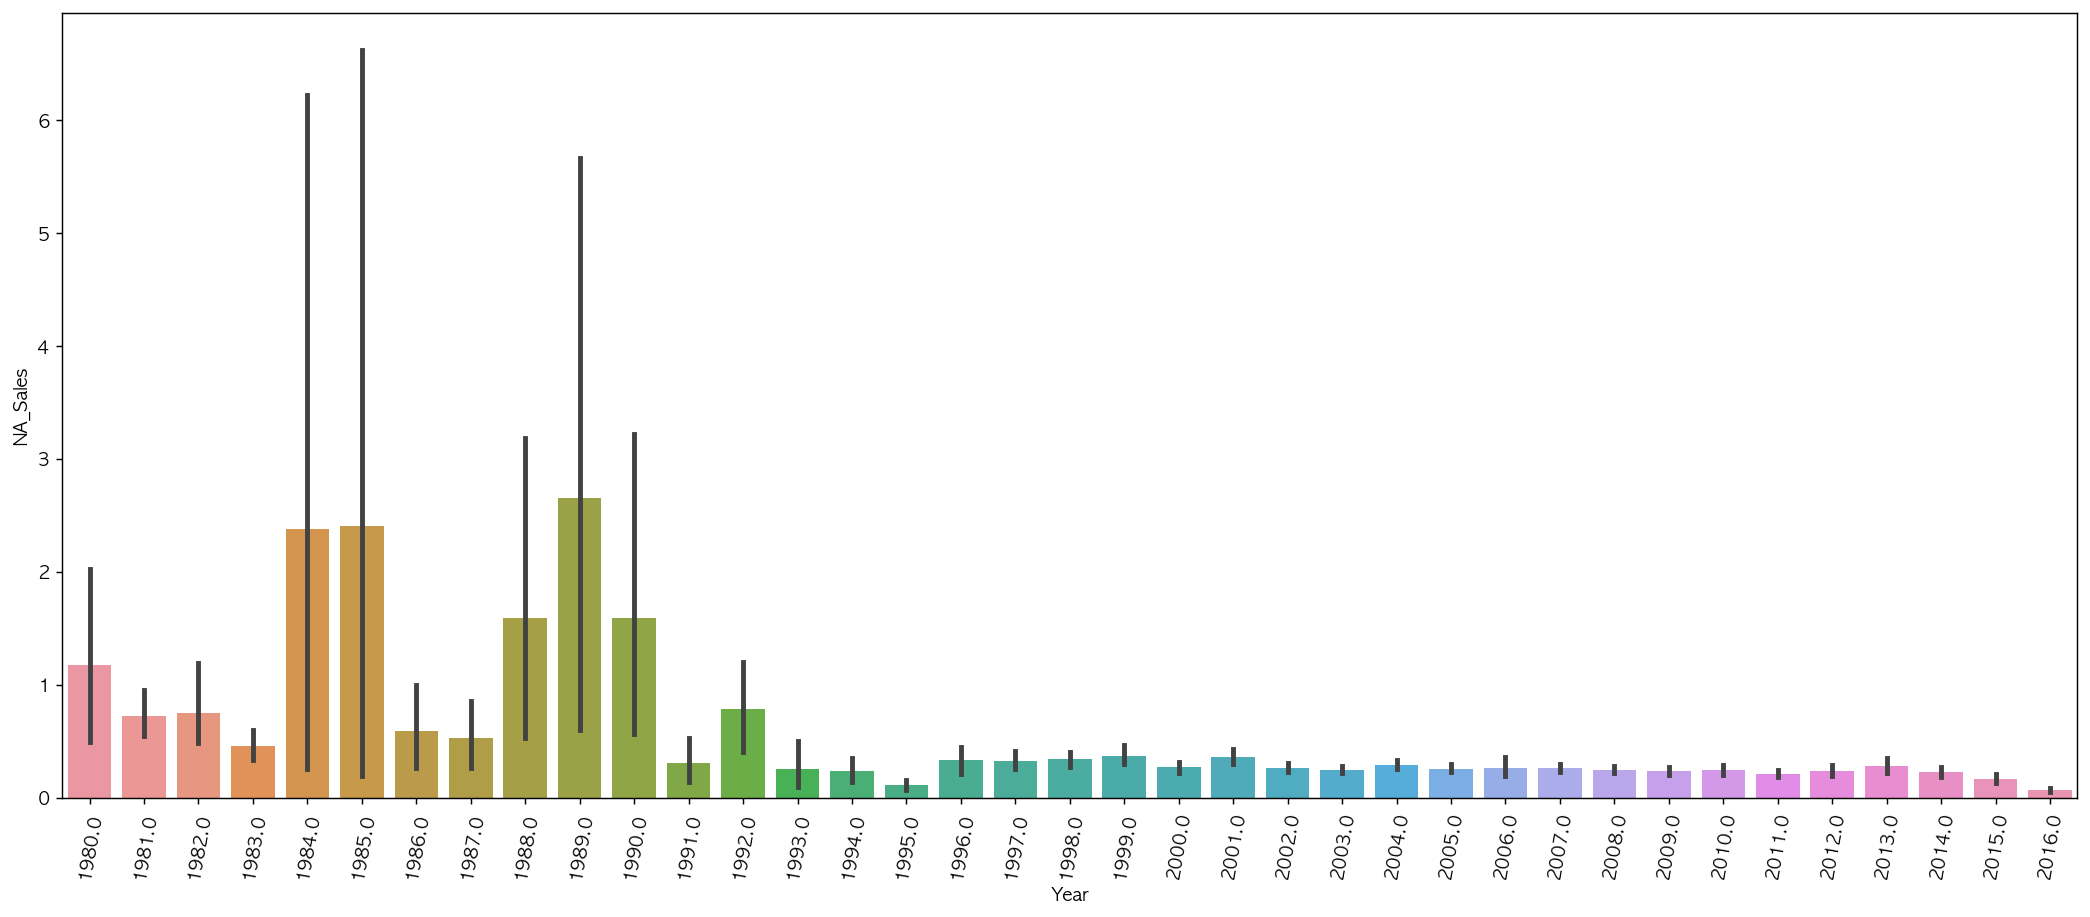

In [ ]:
plt.figure(figsize=(20,8), dpi=130)
plt.xticks(rotation=80)
sns.barplot(data=dffill, x='Year',y='NA_Sales')

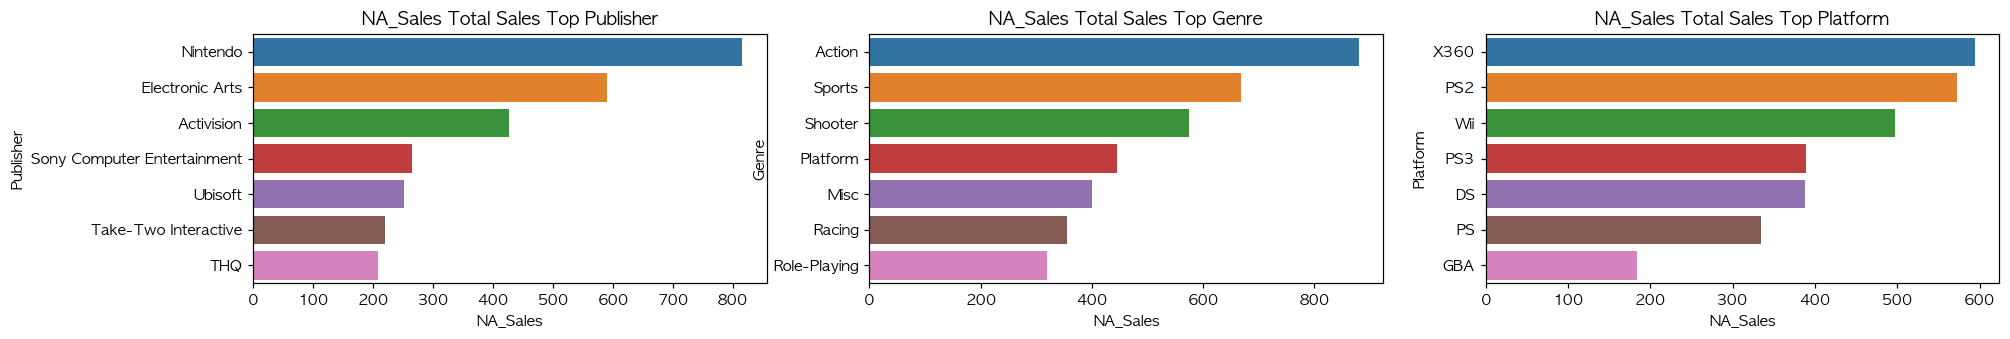

In [ ]:
def Genre_group_By_Region_Top(ax,df,region):
    dftmp = dffill.groupby(['Genre']).agg('sum').sort_values(region, ascending=False).head(7)
    # plt.figure(figsize=(14,10), dpi=100)
    ax.set_title(f"{region} Total Sales Top Genre")#, fontsize=19)
    sns.barplot(ax=ax,data=dftmp.reset_index(), y='Genre', x=region)

def Pub_group_By_Region_Top(ax,df,region):
    dftmp = dffill.groupby(['Publisher']).agg('sum').sort_values(region, ascending=False).head(7)
    # plt.figure(figsize=(14,10), dpi=100)
    ax.set_title(f"{region} Total Sales Top Publisher")#, fontsize=19)
    sns.barplot(ax=ax,data=dftmp.reset_index(), y='Publisher', x=region)

def Platform_group_By_Region_Top(ax,df,region):
    dftmp = dffill.groupby(['Platform']).agg('sum').sort_values(region, ascending=False).head(7)
    # plt.figure(figsize=(14,10), dpi=100)
    ax.set_title(f"{region} Total Sales Top Platform")#, fontsize=19)
    sns.barplot(ax=ax,data=dftmp.reset_index(), y='Platform', x=region)


fig,axes = plt.subplots(1,3, figsize=(5,3), dpi=110)
plt.subplots_adjust(right=3.3)
Pub_group_By_Region_Top(axes[0] , dffill,'NA_Sales')
Genre_group_By_Region_Top(axes[1] , dffill,'NA_Sales')
Platform_group_By_Region_Top(axes[2] , dffill,'NA_Sales')

### 유럽

<AxesSubplot:xlabel='Year', ylabel='EU_Sales'>

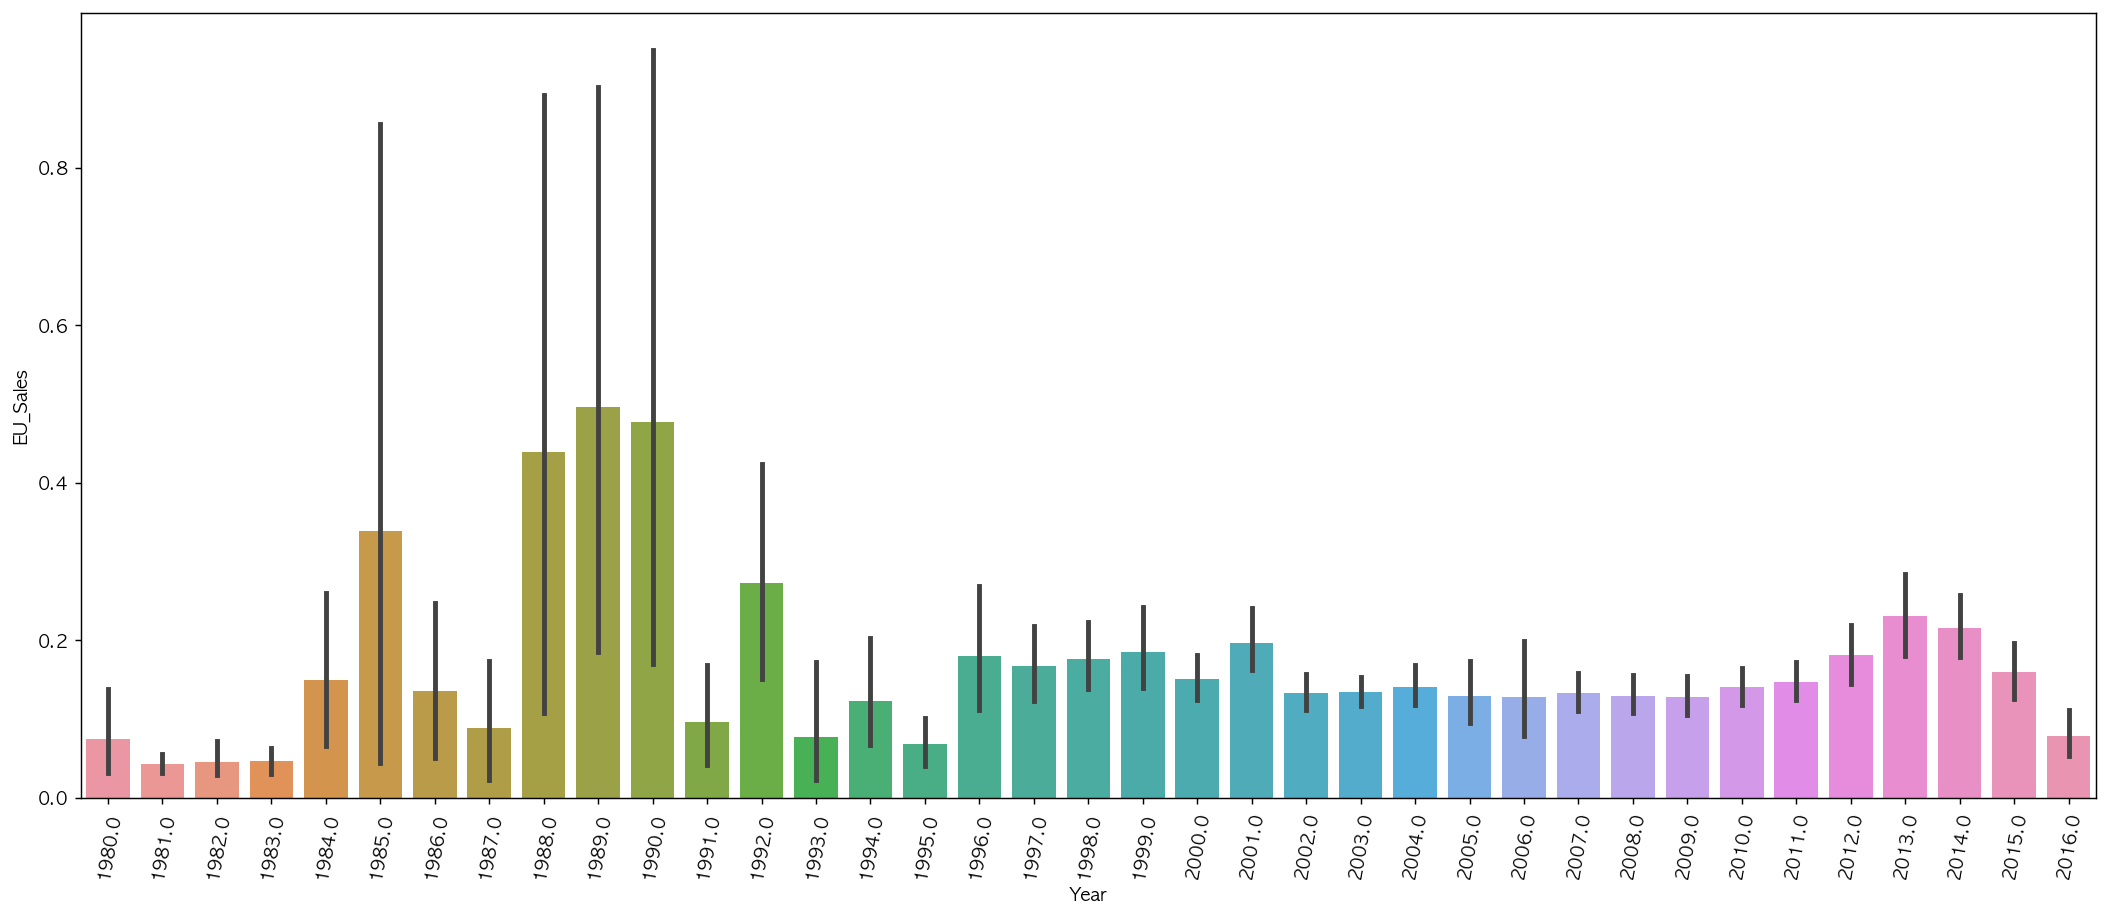

In [ ]:
plt.figure(figsize=(20,8), dpi=130)
plt.xticks(rotation=80)
sns.barplot(data=dffill, x='Year',y='EU_Sales')

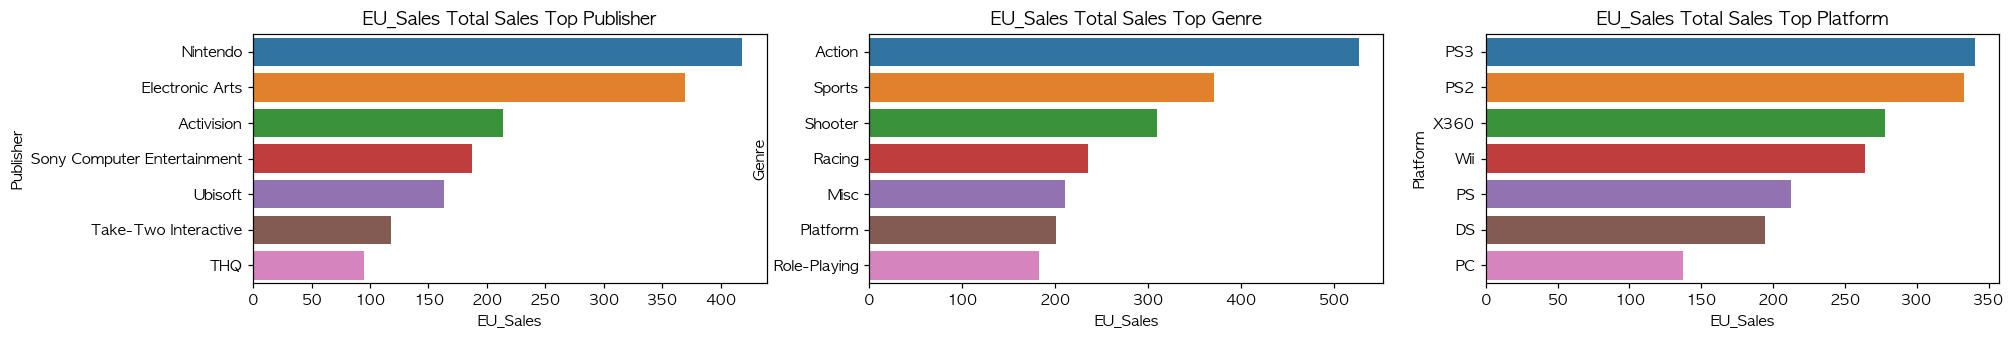

In [ ]:
fig,axes = plt.subplots(1,3, figsize=(5,3), dpi=110)
plt.subplots_adjust(right=3.3)
Pub_group_By_Region_Top(axes[0] , dffill,'EU_Sales')
Genre_group_By_Region_Top(axes[1] , dffill,'EU_Sales')
Platform_group_By_Region_Top(axes[2] , dffill,'EU_Sales')

### 일본

<AxesSubplot:xlabel='Year', ylabel='JP_Sales'>

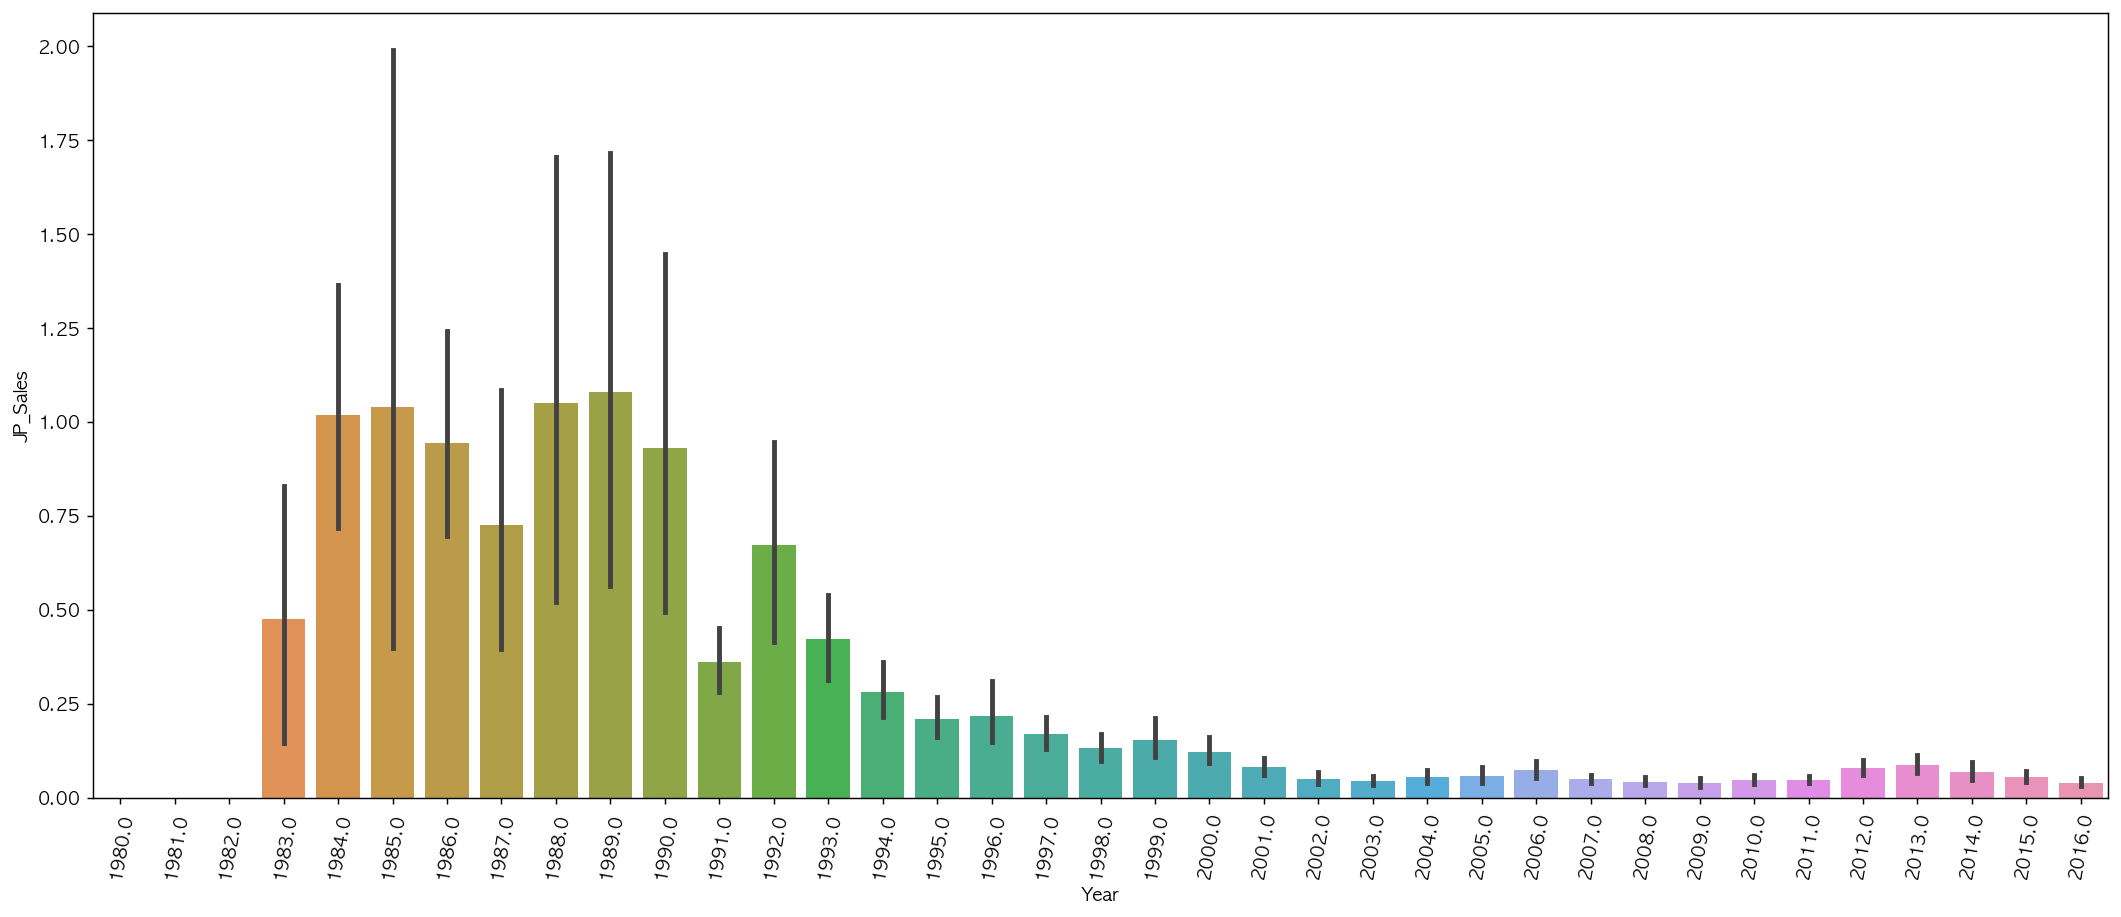

In [ ]:
plt.figure(figsize=(20,8), dpi=130)
plt.xticks(rotation=80)
sns.barplot(data=dffill, x='Year',y='JP_Sales')

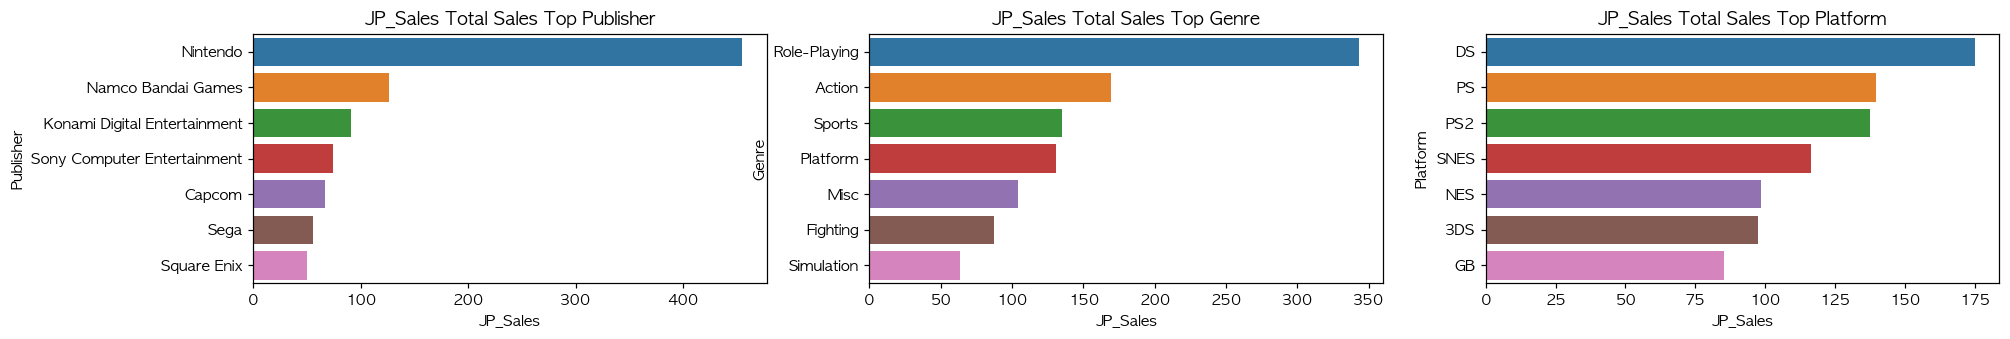

In [ ]:
# Pub_group_By_Region_Top(dffill,'JP_Sales')
fig,axes = plt.subplots(1,3, figsize=(5,3), dpi=110)
plt.subplots_adjust(right=3.3)
Pub_group_By_Region_Top(axes[0] , dffill,'JP_Sales')
Genre_group_By_Region_Top(axes[1] , dffill,'JP_Sales')
Platform_group_By_Region_Top(axes[2] , dffill,'JP_Sales')

### 기타

<AxesSubplot:xlabel='Year', ylabel='Other_Sales'>

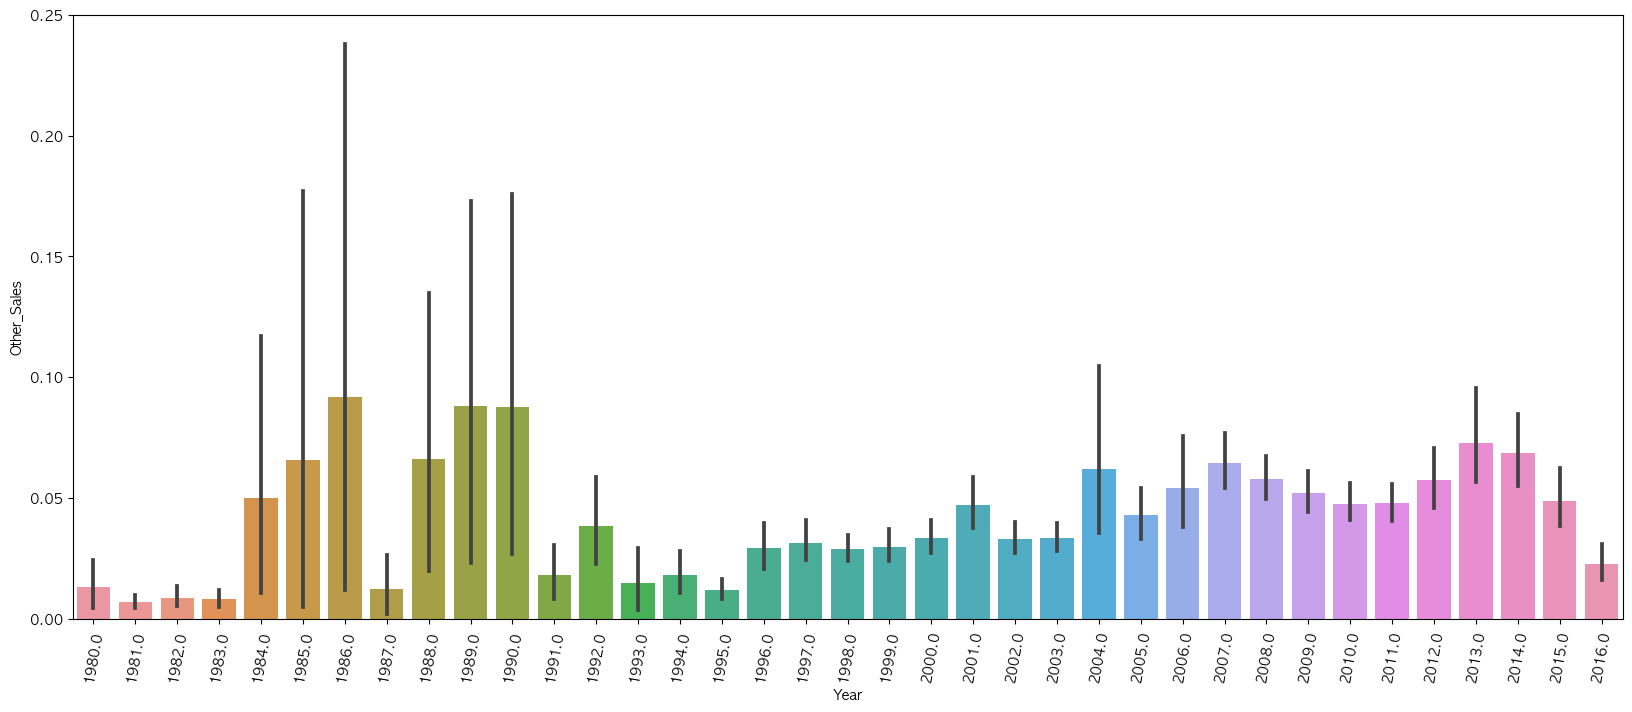

In [ ]:
plt.figure(figsize=(20,8), dpi=100)
plt.xticks(rotation=80)
sns.barplot(data=dffill, x='Year',y='Other_Sales')

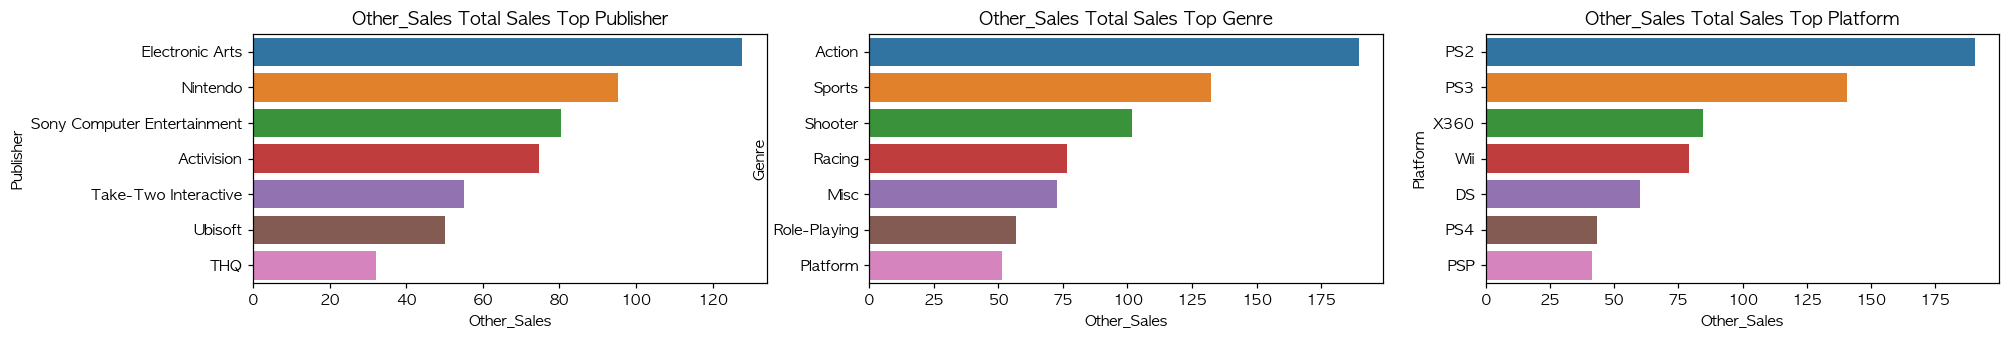

In [ ]:
# Pub_group_By_Region_Top(dffill,'Other_Sales')
fig,axes = plt.subplots(1,3, figsize=(5,3), dpi=110)
plt.subplots_adjust(right=3.3)
Pub_group_By_Region_Top(axes[0] , dffill,'Other_Sales')
Genre_group_By_Region_Top(axes[1] , dffill,'Other_Sales')
Platform_group_By_Region_Top(axes[2] , dffill,'Other_Sales')

#  연도별 장르 통합 차트 & 연도별 Platform 통합 차트

## 연도 장르별 TOP

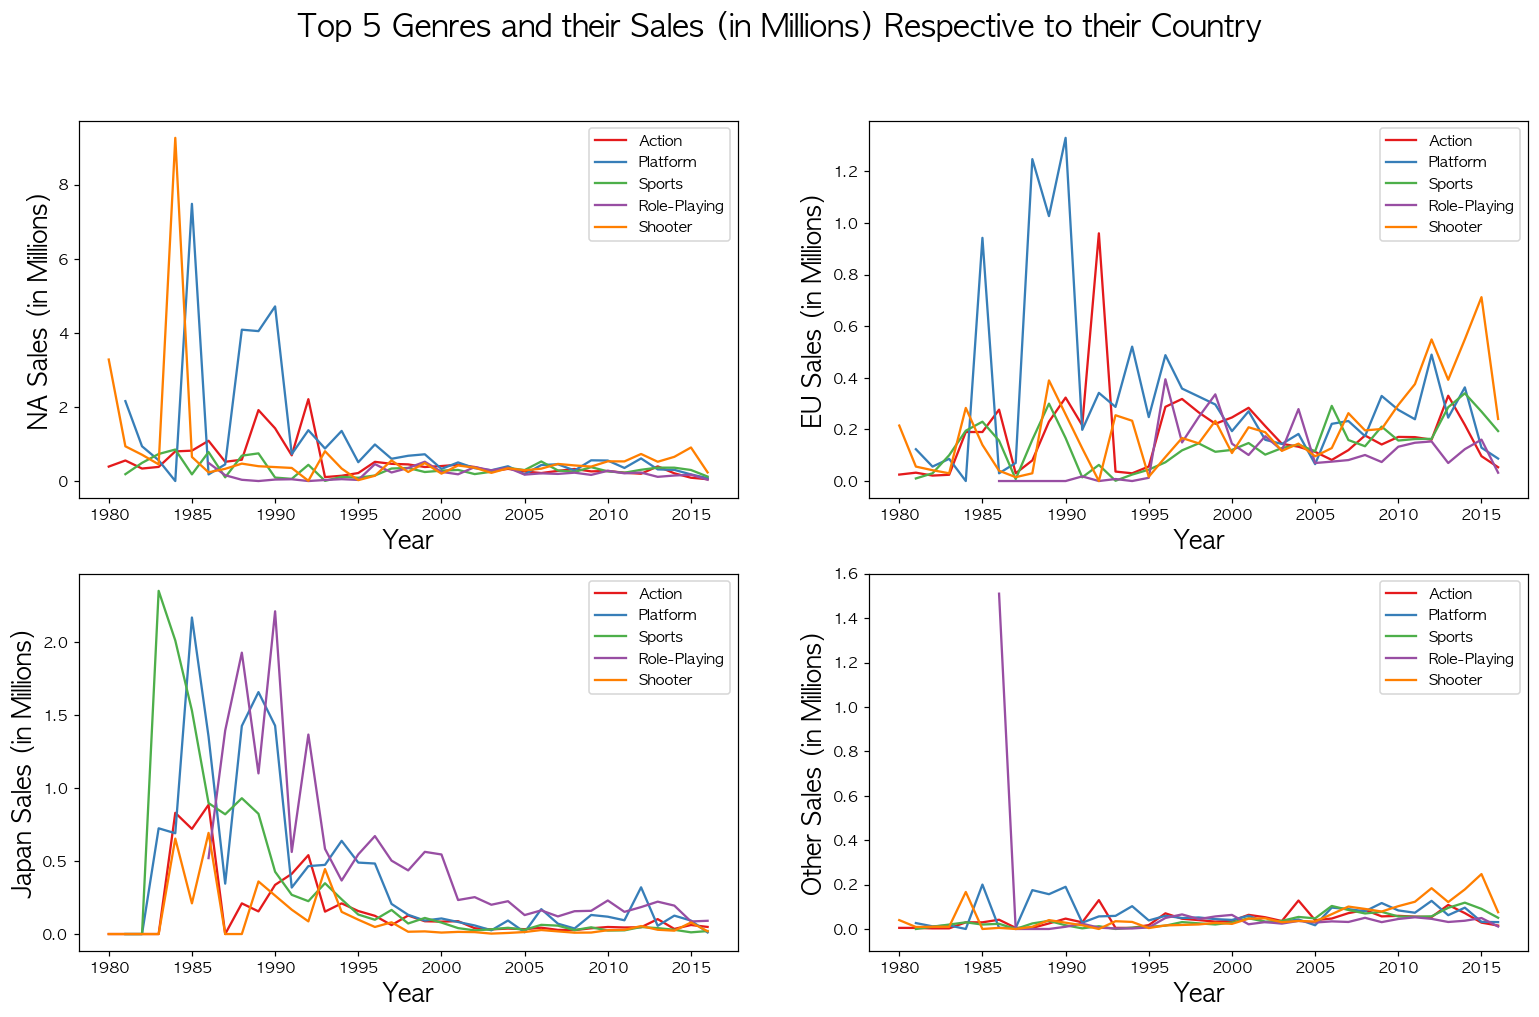

In [ ]:
top5_genres_list = dffill.groupby(['Genre'])['Total_Sales'].sum().sort_values(ascending=False).head(5).index

top5_genre_df = dffill[dffill.Genre.isin(top5_genres_list)]
fig, (ax0,ax1) = plt.subplots(2,2, figsize=(17,10))

fig.suptitle('Top 5 Genres and their Sales (in Millions) Respective to their Country', fontsize=20, fontweight = 'bold')

sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax0[0], palette='Set1')

sns.lineplot(x='Year', y='EU_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax0[1], palette='Set1')

sns.lineplot(x='Year', y='JP_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1[0], palette='Set1')

sns.lineplot(x='Year', y='Other_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1[1], palette='Set1')

ax0[0].legend(loc='upper right')
ax0[1].legend(loc='upper right')
ax1[0].legend(loc='upper right')
ax1[1].legend(loc='upper right')

ax1[1].set_ylim(-0.1,1.6)

ax0[0].set_ylabel('NA Sales (in Millions)', fontsize=16)
ax0[1].set_ylabel('EU Sales (in Millions)', fontsize=16)
ax1[0].set_ylabel('Japan Sales (in Millions)', fontsize=16)
ax1[1].set_ylabel('Other Sales (in Millions)', fontsize=16)

ax0[0].set_xlabel('Year', fontsize=16)
ax0[1].set_xlabel('Year', fontsize=16)
ax1[0].set_xlabel('Year', fontsize=16)
ax1[1].set_xlabel('Year', fontsize=16)


plt.show()

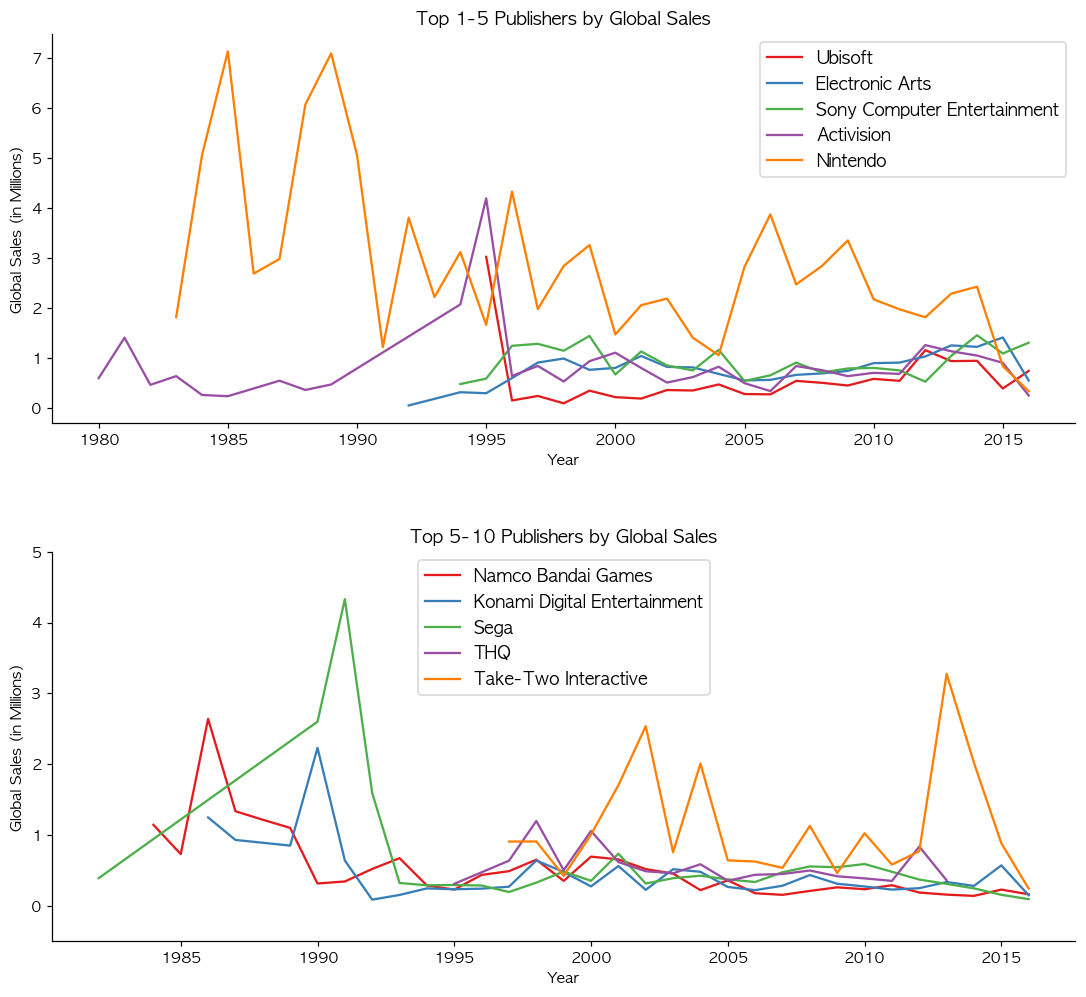

In [ ]:
df=dffill.loc[:]

top10_publishers_list = dffill.groupby(['Publisher'])['Total_Sales']\
    .sum()\
    .sort_values(ascending=False).head(10).index

zero_to_five_publishers_list = top10_publishers_list[0:5]
five_to_ten_publishers_list = top10_publishers_list[5:]
zero_to_five_publishers_df = df[df.Publisher.isin(zero_to_five_publishers_list)]
five_to_ten_publishers_df = df[df.Publisher.isin(five_to_ten_publishers_list)]


fig, (ax0, ax1) = plt.subplots(2,1, figsize=(12,10))
plt.subplots_adjust(hspace=0.33, top=.95)

# 1 - 5 in Global Sales
sns.lineplot(x='Year', y='Total_Sales',
             data=zero_to_five_publishers_df, hue='Publisher',
             ci=None, ax=ax0, palette='Set1')

ax0.legend(prop={'size':11.5})

# 5-10 in Global Sales
sns.lineplot(x='Year', y='Total_Sales',
             data=five_to_ten_publishers_df, hue='Publisher',
             ci=None, ax=ax1, palette='Set1')

ax0.set_title('Top 1-5 Publishers by Global Sales')
ax0.set_ylabel('Global Sales (in Millions)')

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)

ax1.set_title('Top 5-10 Publishers by Global Sales')
ax1.set_ylabel('Global Sales (in Millions)')
ax1.legend(loc='upper center', prop={'size': 11.5})
ax1.set_ylim(-0.5, 5)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

plt.show()

Text(0, 0.5, 'Total Sales')

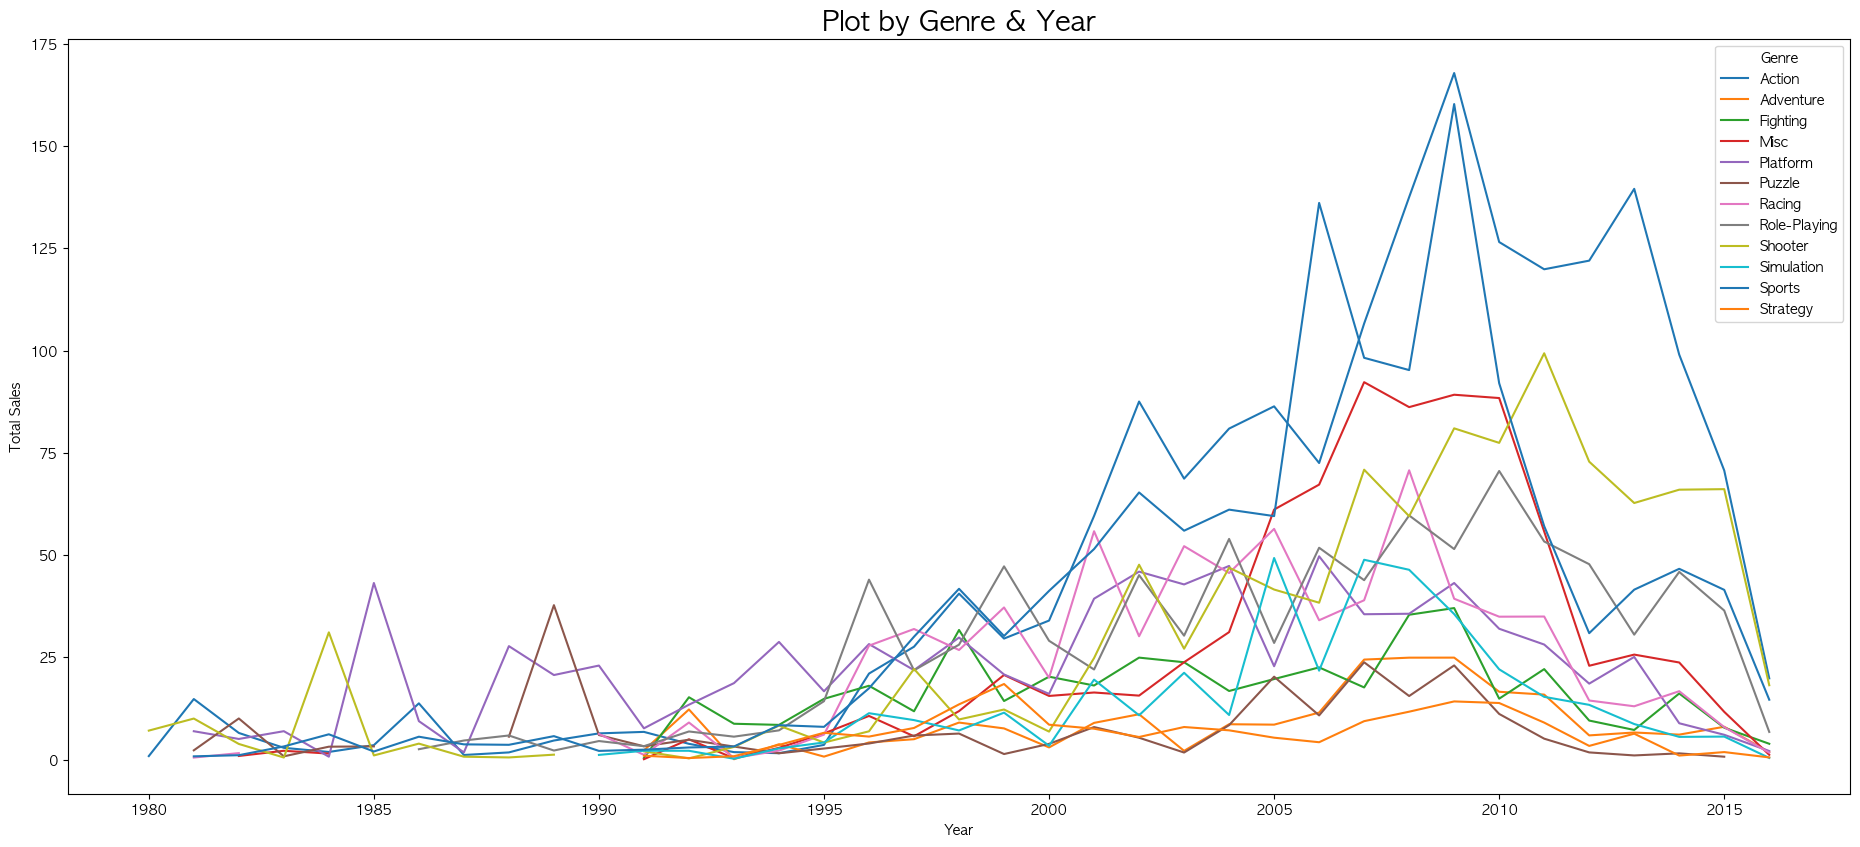

In [ ]:
# 연도별 장르 곡선
plt.rcParams["figure.dpi"] = 100
tmp=dffill.groupby(['Year','Genre']).agg('sum')
tmp["Total_Sales"].unstack().plot(figsize=(23,10))
plt.title("Plot by Genre & Year", fontsize=20)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Total Sales',fontsize=10)

Text(0, 0.5, 'Total Sales')

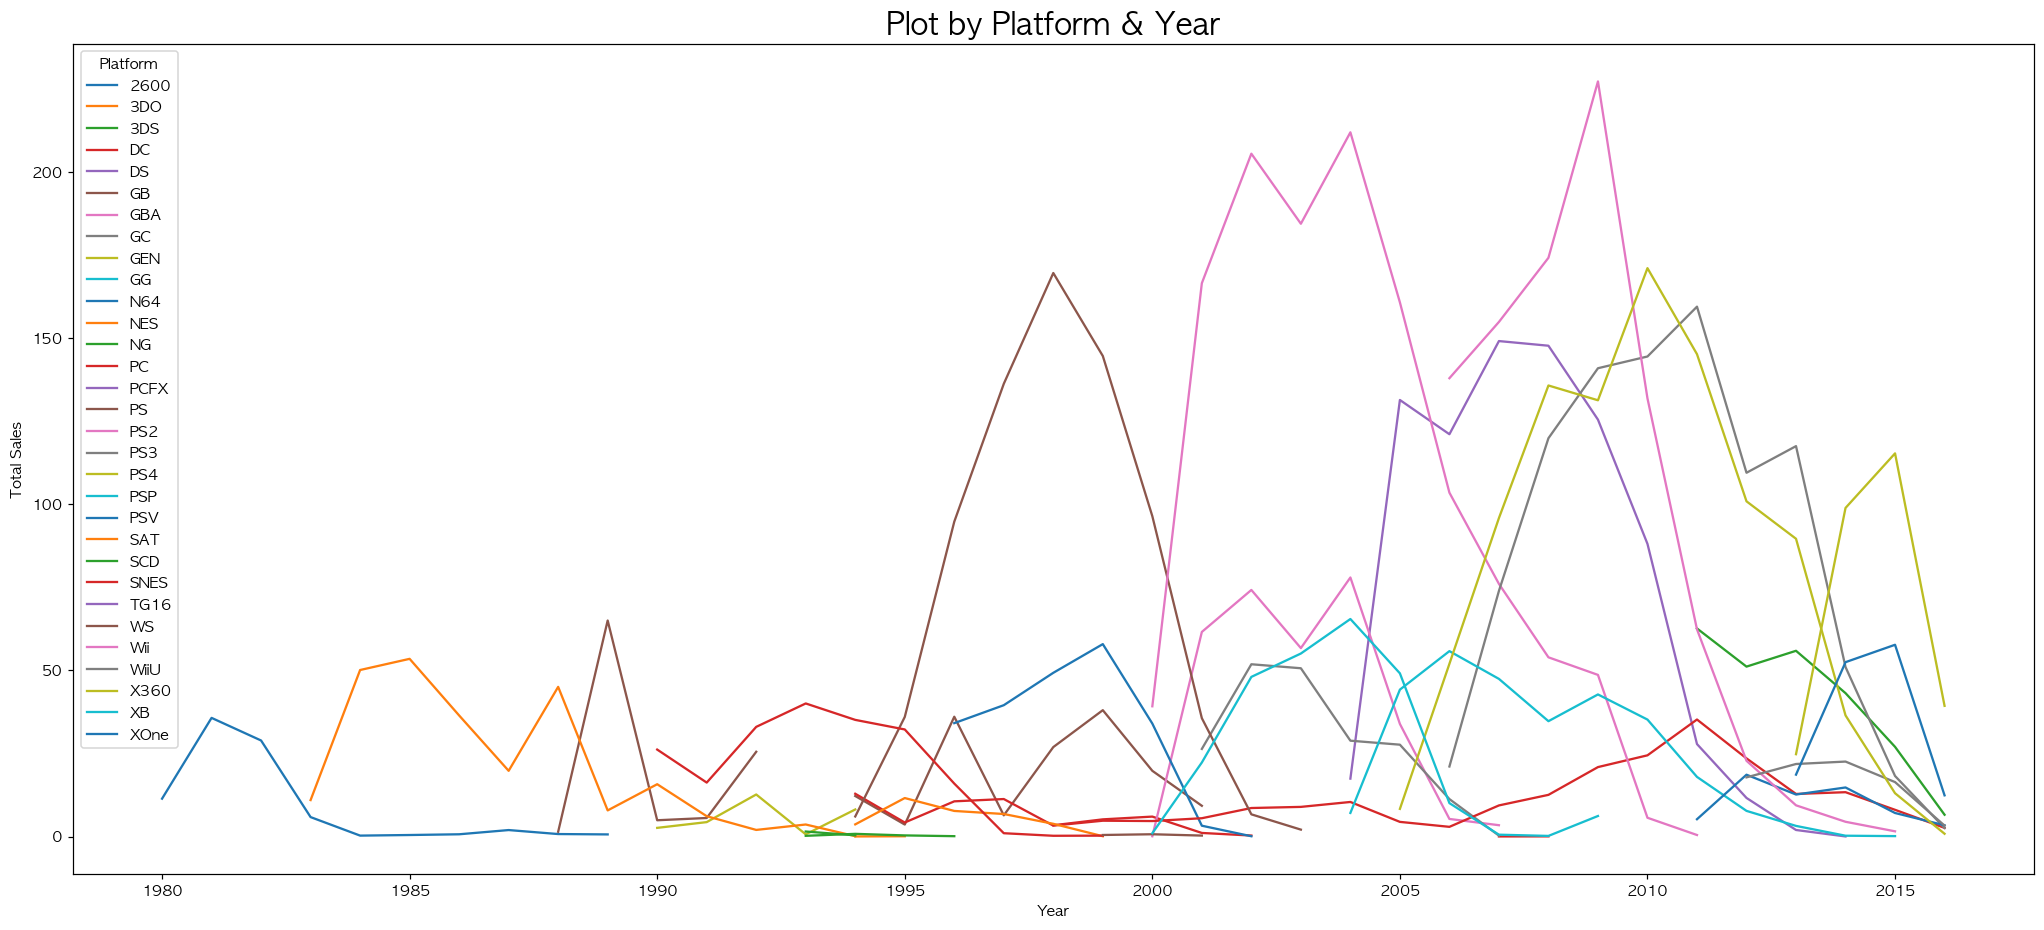

In [ ]:
# 연도별 플랫폼 곡선
plt.rcParams["figure.dpi"] = 110
tmp=dffill.groupby(['Year','Platform']).agg('sum')
tmp["Total_Sales"].unstack().plot(figsize=(23,10))
plt.title("Plot by Platform & Year", fontsize=20)
plt.xlabel('Year',fontsize=10)
plt.ylabel('Total Sales',fontsize=10)

##


In [ ]:
# 연도별 트랜드 수 Count & plot

## 연도별 게임장르 상관계수 Heatmap
 Total_Sales합계 df를 만들고, 각 장르의 연도별 판매량에 상관관계(피어슨상관계수)가 있는지 확인  
 > 북미지역과 유럽의 강한 상관관계가 있으며, 유럽과 기타지역이 또한 상관관계를 갖고있었습니다. 

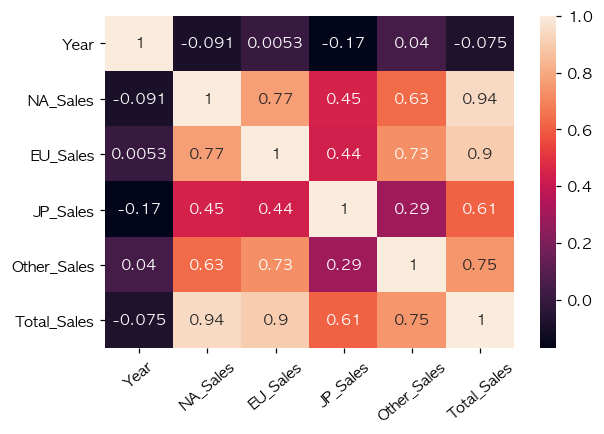

In [ ]:
sns.heatmap(dfraw.corr(), annot=True)
plt.xticks(rotation=40)
plt.show()

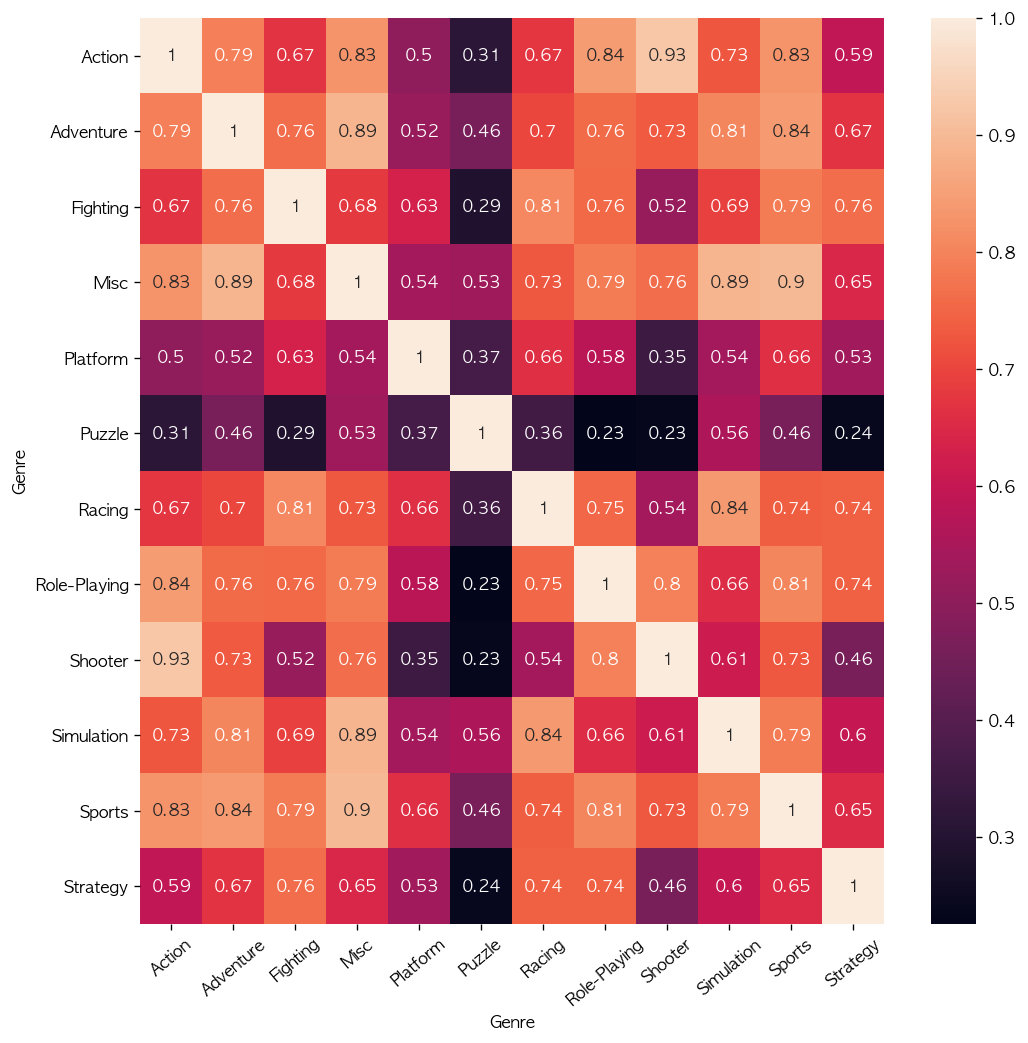

In [ ]:
df_gen_y=pd.pivot_table(dffill, index='Year',values='Total_Sales',columns='Genre', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,10), dpi=120)
sns.heatmap(df_gen_y.corr(), annot=True)
plt.xticks(rotation=40)
plt.show()

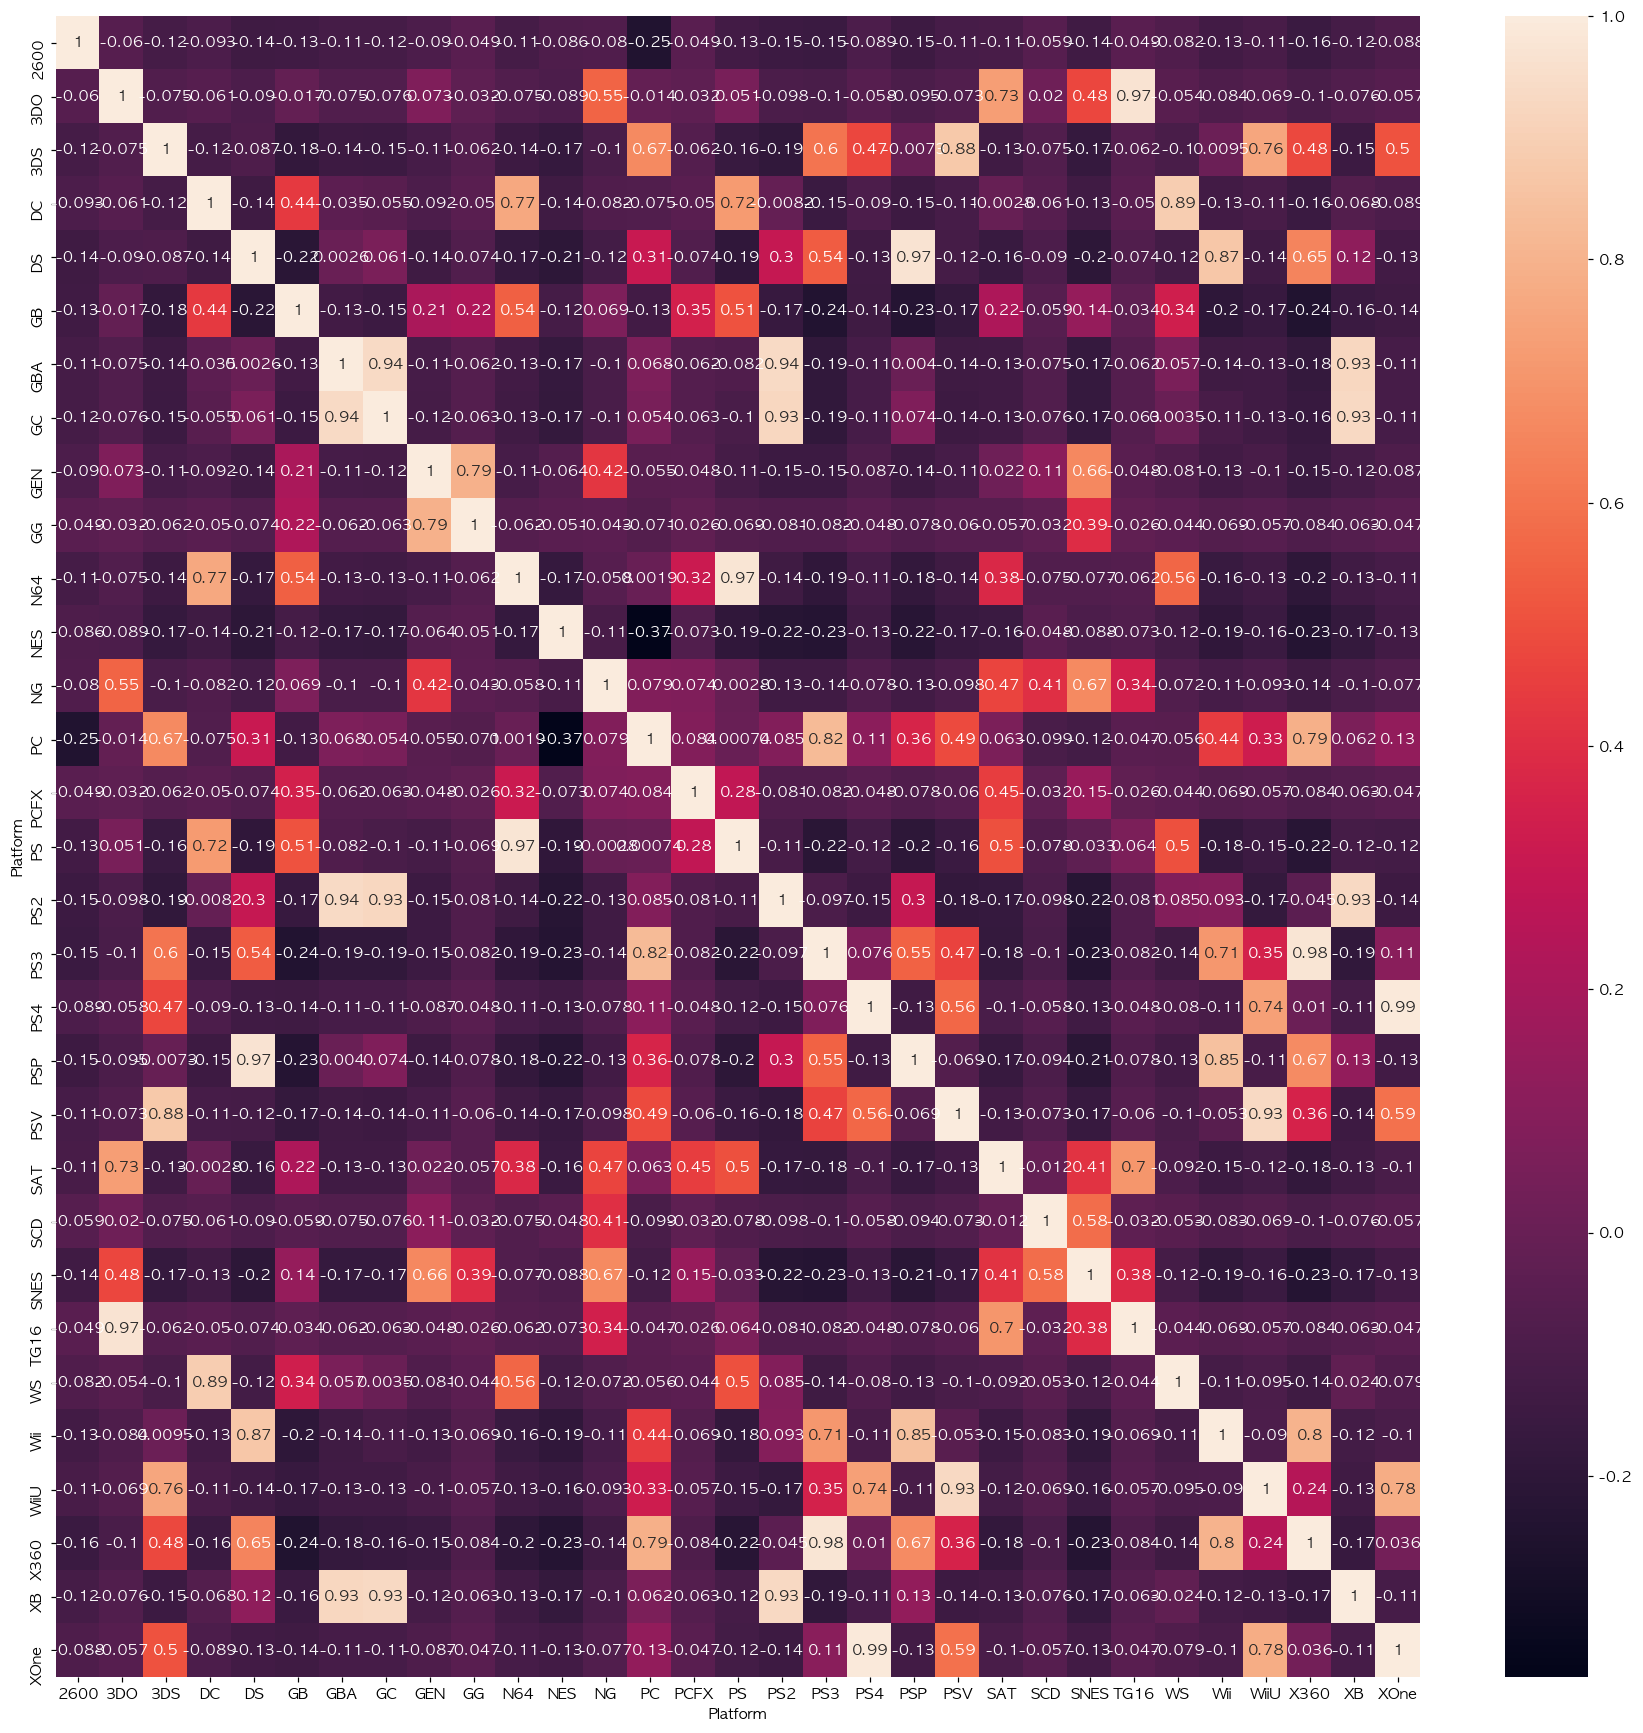

In [ ]:
# 연도별 플랫폼 수 Count & plot
df_plat_y=pd.pivot_table(dffill, index='Year',values='Total_Sales',columns='Platform', aggfunc='sum', fill_value=0)
plt.figure(figsize=(20,20))
sns.heatmap(df_plat_y.corr(), annot=True)
plt.show()

In [ ]:
dffill.groupby(['Genre','Platform']).agg('sum')['Total_Sales'].unstack()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,
Action,29.75,NaN,71.26,1.26,116.08,7.93,55.89,38.41,2.74,NaN,...,0.65,NaN,10.08,NaN,NaN,127.47,19.31,243.31,53.54,33.80
Adventure,1.70,0.06,4.82,2.50,47.25,17.15,14.45,5.93,0.19,NaN,...,4.16,NaN,1.50,0.14,NaN,18.36,0.19,15.19,3.02,2.49
Fighting,1.24,NaN,10.44,1.83,7.20,NaN,4.16,18.43,5.89,NaN,...,8.53,NaN,26.94,NaN,NaN,23.84,6.34,37.09,13.53,2.34
Misc,3.57,NaN,10.47,NaN,137.60,13.35,36.09,16.72,0.03,NaN,...,1.20,0.09,5.02,NaN,NaN,212.13,12.21,91.97,9.49,6.88
Platform,13.26,NaN,32.25,2.53,77.39,54.91,78.21,28.59,15.44,0.04,...,0.76,1.50,65.65,NaN,NaN,90.75,21.26,11.37,9.63,0.80
Puzzle,14.69,0.02,5.56,NaN,83.83,47.47,12.81,3.98,NaN,NaN,...,1.00,NaN,6.38,NaN,NaN,15.57,1.34,0.87,0.41,NaN
Racing,2.91,NaN,14.51,2.65,38.59,4.55,18.81,21.87,0.26,NaN,...,2.40,0.07,13.49,NaN,NaN,61.13,7.78,65.78,29.10,8.83
Role-Playing,NaN,NaN,61.37,0.68,126.77,88.24,64.15,13.16,0.27,NaN,...,3.76,0.06,36.45,NaN,1.22,14.08,2.44,71.97,13.51,9.46
Shooter,26.47,NaN,1.30,0.33,8.10,1.19,3.56,13.61,0.13,NaN,...,3.97,NaN,6.06,0.02,NaN,28.59,6.16,278.44,62.71,51.59


In [ ]:
#장르와 플랫폼의 피벗차트
pd.pivot_table(dffill, index='Genre', columns='Platform', values='Total_Sales', aggfunc='sum', fill_value=0).T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,29.75,1.70,1.24,3.57,13.26,14.69,2.91,0.00,26.47,0.44,2.95,0.00
3DO,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
3DS,71.26,4.82,10.44,10.47,32.25,5.56,14.51,61.37,1.30,27.12,6.20,2.07
DC,1.26,2.50,1.83,0.00,2.53,0.00,2.65,0.68,0.33,0.52,3.65,0.00
DS,116.08,47.25,7.20,137.60,77.39,83.83,38.59,126.77,8.10,131.27,31.76,15.33
GB,7.93,17.15,0.00,13.35,54.91,47.47,4.55,88.24,1.19,3.55,9.06,8.06
GBA,55.89,14.45,4.16,36.09,78.21,12.81,18.81,64.15,3.56,5.94,16.32,7.46
GC,38.41,5.93,18.43,16.72,28.59,3.98,21.87,13.16,13.61,8.61,25.34,4.28
GEN,2.74,0.19,5.89,0.03,15.44,0.00,0.26,0.27,0.13,0.00,3.21,0.19


# 지역에 따라 선호하는 게임 장르가 다를까?

In [ ]:
dffill

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## Chi-square Test 
선호하는 게임 장르를 판단하는 기준으로, 해당 지역의 장르별 총 판매액을 기준으로 하였다.  
$H_0$ : 지역에 따른 게임 장르별 판매량의 차이가 없다.  
$H_1$ : 지역에 따른 게임 장르별 판매량의 차이가 있다.  
$\alpha : 0.05$  
p-value (a = 0.05): 8.922387761265447e-124 으로 귀무가설($H_0$)기각 , 대립가설($H_1$)채택.  
지역에 따른 게임 장르별 판매량의 **차이가 있다**고 할 수 있다.  
따라서, 지역에 따른 장르의 선호도가 차이가 있다고 할 수 있습니다.


In [ ]:
gen_region_df = dffill.drop(['Year','Total_Sales'],axis=1).groupby("Genre").sum()
gen_region_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,895.42,535.28,170.77,191.99
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.91,56.96
Shooter,581.92,313.05,38.28,102.65


In [ ]:
from scipy import stats

In [ ]:
chi, p, dof, expected = stats.chi2_contingency(gen_region_df)
print(f"chi 스퀘어 값: {chi}",
      f"p-value (a = 0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{gen_region_df}", sep = "\n" )

chi 스퀘어 값: 689.3195002108183
p-value (a = 0.05): 8.922387761265447e-124
자유도 수: 33
기대값: 
             0           1           2           3
0   883.639396  489.653961  259.693843  160.472799
1   117.494389   65.107546   34.530567   21.337498
2   220.927094  122.423046   64.928529   40.121331
3   394.022782  218.341121  115.799828   71.556269
4   409.055087  226.671020  120.217691   74.286202
5   119.957894   66.472656   35.254569   21.784881
6   358.582804  198.702651  105.384331   65.120214
7   445.889408  247.082142  131.042973   80.975477
8   510.388885  282.823447  149.998802   92.688865
9   192.744601  106.806190   56.645942   35.003267
10  653.833832  362.311060  192.156010  118.739098
11   86.143829   47.735159   25.316913   15.644098
측정값: 
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          895.42    535.28    170.77       191.99
Adventure       105.66     64.05     51.95        16.81
Fighting        223

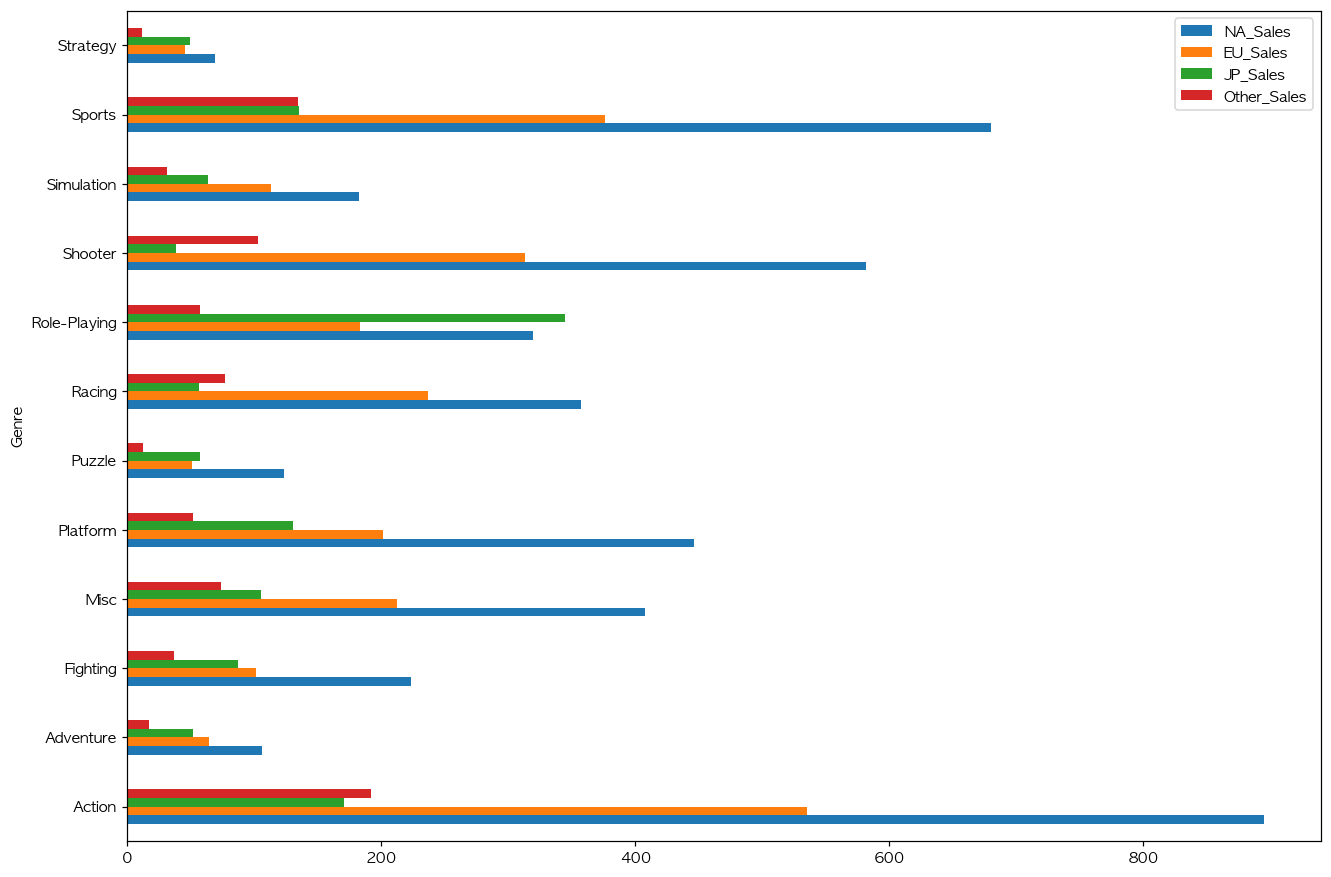

In [ ]:
# plt.figure(figsize=(20,15))
gen_region_df.plot(kind='barh',figsize=(14,10))
plt.show()

# 연도별 게임의 트렌드가 있을까?



In [ ]:
pd.pivot_table(data=dffill, index='Platform',columns='Genre',values='Total_Sales', fill_value=0, aggfunc='count')

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,56,1,1,5,9,8,4,0,22,1,9,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,181,36,14,53,28,20,10,84,6,28,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,340,237,36,388,90,235,66,196,42,278,146,78
GB,6,5,0,8,18,15,2,21,1,5,9,7
GBA,164,36,23,110,139,39,64,72,40,18,88,18
GC,99,20,42,35,73,11,60,25,48,12,106,11
GEN,3,2,5,1,7,0,1,3,1,0,3,1


## 데이터
출시량이 적어도 매출액이 높으면 히트작, 매출액이 적고, 출시량이 적으면 손해이므로  
연도별 장르별 $\sum(세계 매출액)$ 을 하면, 
판매량과, 출시량을 함께 볼 수 있을거라 생각하였다.  
결국 히트작을 만들고 출시하는 것을 목표로 할 때, 최근 10년 간 가장 인기있는 장르 5개를 기준으로 하면 좋겠다는 생각에 , 장르를 상위 5개로 추렸습니다.


In [ ]:
dfAfter2006=dffill.query("Year>2006")
top5Gen=list(dfAfter2006.groupby('Genre').agg('sum').sort_values('Total_Sales', ascending=False).head(5).index)
top5Gen

top5Plat=list(dfAfter2006.groupby('Platform').agg('sum').sort_values('Total_Sales', ascending=False).head(5).index)
top5Gen , top5Plat

(['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing'],
 ['PS3', 'X360', 'Wii', 'DS', 'PS4'])

In [ ]:
# dffill.drop(['Total_Sales'],axis=1).groupby(["Year",'Platform','Genre']).describe()
df_pivot_year_genre=pd.pivot_table(data=dfAfter2006, index='Year',columns='Genre',values='Total_Sales', fill_value=0, aggfunc='sum')
df_pivot_year_genre[top5Gen]

##
# df_pivot_year_platform=pd.pivot_table(data=dffill, index='Year',columns='Platform',values='NA_Sales', fill_value=0)
# df_pivot_year_platform

Genre,Shooter,Platform,Sports,Racing,Role-Playing
Year,,,,,
2007.0,70.88,35.53,98.24,38.95,43.86
2008.0,59.51,35.65,95.24,70.73,59.69
2009.0,69.84,40.95,138.59,34.09,47.96
2010.0,77.44,31.98,92.02,34.93,70.56
2011.0,99.35,28.12,57.06,34.97,53.32
2012.0,72.84,18.56,30.90,14.43,47.77
2013.0,62.73,25.09,41.54,13.02,30.54
2014.0,65.99,8.87,46.64,16.71,45.89
2015.0,66.12,6.05,41.49,7.92,36.43


## 연도별 게임트렌드 검정

### 장르
같은 장르로, 같은 게임이 다른 플랫폼으로 출시되는 경우가 많음. 
-- 출시량과 매출액의 관계가 있을까  
$H_0$ : 연도에 따른 게임 장르별 판매량의 차이가 없다.  
$H_1$ : 연도 따른 게임 장르별 판매량의 차이가 있다.  
$\alpha : 0.05$  
p-value (a = 0.05): 
- 전체 데이터 : 1.460019161082613e-42 으로 귀무가설($H_0$)기각 , 대립가설($H_1$)채택.    
- 상위 5개 장르에 대하여도 동일하게 검정한 결과 p-value = 4.8459596310413454e-29 로 귀무가설($H_0$)기각 , 대립가설($H_1$)채택.    

연도에 따른 게임 장르별 판매량의 **차이가 있다**고 할 수 있다.  
따라서, 연도에 따른 장르의 게임 트렌드(장르별 매출액)에 차이가 있다고 할 수 있습니다.



In [ ]:
df_pivot_year_genre.tail(5)
def chi(df):
    chi, p, dof, expected = stats.chi2_contingency(df)
    print(f"chi 스퀘어 값: {chi}",
        f"p-value (a = 0.05): {p}",
        f"자유도 수: {dof}",
        f"기대값: \n{pd.DataFrame(expected)}",
        f"측정값: \n{df}", sep = "\n" )
chi(df_pivot_year_genre)#[top5Gen])


chi 스퀘어 값: 428.5625297056944
p-value (a = 0.05): 1.460019161082613e-42
자유도 수: 99
기대값: 
           0          1          2          3          4          5   \
0  147.471321  17.851547  22.742345  66.100779  31.761543  11.017251   
1  163.910977  19.841584  25.277593  73.469494  35.302224  12.245421   
2  161.159358  19.508498  24.853251  72.236141  34.709595  12.039854   
3  145.036174  17.556771  22.366808  65.009278  31.237075  10.835327   
4  124.639406  15.087722  19.221313  55.866875  26.844134   9.311530   
5   87.766744  10.624250  13.534981  39.339514  18.902707   6.556856   
6   88.897347  10.761111  13.709338  39.846283  19.146210   6.641321   
7   81.437295   9.858064  12.558883  36.502478  17.539506   6.083997   
8   63.840462   7.727950   9.845181  28.615084  13.749599   4.769377   
9   17.120917   2.072504   2.640309   7.674075   3.687407   1.279065   

          6          7           8          9          10         11  
0  36.472311  60.387575   90.406106  27.247171  8

In [ ]:
chi(df_pivot_year_genre[top5Gen])

chi 스퀘어 값: 224.16242049109457
p-value (a = 0.05): 4.8459596310413454e-29
자유도 수: 36
기대값: 
            0          1          2          3          4
0  133.824211  82.039855  81.232910  59.983762  54.799262
1  142.362864  87.274408  86.415975  63.811025  58.295728
2  153.640513  94.188080  93.261644  68.865984  62.913778
3  147.824612  90.622689  89.731322  66.259134  60.532243
4  125.217327  76.763474  76.008428  56.125915  51.274856
5   96.316522  59.046069  58.465290  43.171765  39.440354
6   97.482951  59.761139  59.173327  43.694591  39.917992
7   91.384378  56.022457  55.471419  40.961039  37.420706
8   73.553280  45.091246  44.647728  32.968641  30.119105
9   19.673342  12.060584  11.941956   8.818143   8.055976
측정값: 
Genre   Action  Shooter  Sports   Misc  Role-Playing
Year                                                
2007.0  106.62    70.88   98.24  92.28         43.86
2008.0  137.54    59.51   95.24  86.18         59.69
2009.0  139.58    69.84  138.59  76.90         47.96
20

### 플랫폼
$H_0$ : 연도에 따른 게임 플랫폼별 판매량의 차이가 없다.  
$H_1$ : 연도 따른 게임 플랫폼별 판매량의 차이가 있다.  
$\alpha : 0.05$  
p-value (a = 0.05): 
<!-- - 전체 데이터 : 0.99 으로 귀무가설($H_0$)채택.     -->
- 상위 5개 장르에 대하여도 동일하게 검정한 결과 p-value = 0.99 으로 귀무가설($H_0$)채택.    

연도에 따른 게임 플랫폼별 판매량의 **차이가 없다**고 할 수 있다.  
따라서, 연도에 따른 장르의 게임 플랫폼(플랫폼별 매출액)에 차이가 없다고 할 수 있습니다.


In [ ]:
top5Plat=list(dfAfter2006.groupby('Platform').agg('sum').sort_values('Total_Sales', ascending=False).head(5).index)
df_pivot_year_platform=pd.pivot_table(data=dfAfter2006, index='Year',columns='Platform',values='NA_Sales', fill_value=0)
# df_pivot_year_platform[top5Plat]
chi(df_pivot_year_platform[top5Plat])

chi 스퀘어 값: 3.853698571901949
p-value (a = 0.05): 0.9999999999966095
자유도 수: 36
기대값: 
          0         1         2         3         4
0  0.322674  0.531732  0.357641  0.125547  0.184499
1  0.315373  0.519701  0.349550  0.122706  0.180324
2  0.281286  0.463529  0.311768  0.109443  0.160834
3  0.286398  0.471953  0.317434  0.111432  0.163757
4  0.222176  0.366122  0.246252  0.086445  0.127036
5  0.285265  0.470087  0.316179  0.110992  0.163109
6  0.456521  0.752298  0.505993  0.177624  0.261030
7  0.262067  0.431859  0.290467  0.101966  0.149845
8  0.144599  0.238284  0.160269  0.056261  0.082679
9  0.035687  0.058809  0.039555  0.013885  0.020405
측정값: 
Platform       PS3      X360       Wii        DS       PS4
Year                                                      
2007.0    0.357222  0.511789  0.450535  0.202546  0.000000
2008.0    0.411367  0.564658  0.350248  0.161382  0.000000
2009.0    0.386605  0.427572  0.358585  0.154099  0.000000
2010.0    0.336575  0.589066  0.295394  0.1

## 연도별 데이터 PCA
장르 PCA가 제대로 작동하지 않는 이유  
- 이상치의 영향 (히트작의 매출액은 이상치와 같은역할을 함)
- pivot_table구성 중 null값을 0으로 만듦 -> 0.00001만큼이라도 매출이 생긴것과의 구분이 힘들어짐 (이상치까지 있는 상황에서)
- 단순히 지역별 매출액으로 장르를 설명할 수 있는 축을 구성하는게 쉽지 않음 (데이터의 부족)

In [ ]:
# df_pivot_year_platform
x=RobustScaler().fit_transform(df_pivot_year_genre)
pca=PCA(n_components=10)
principalComponents=pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = [f'pc{i+1}' for i in range(10)] ) 
# principalComponents
print('2개 :',sum(pca.explained_variance_ratio_[:2]),'\t 3개 :', sum(pca.explained_variance_ratio_[:3]))
pd.DataFrame(principalComponents).head()

2개 : 0.5483945611006908 	 3개 : 0.7530611963230446


,0,1,2,3,4,5,6,7,8,9
0,-1.939001,-3.788998,4.025684,0.714669,0.806898,-2.280799,-2.091490,0.558997,0.181165,-0.572155
1,-2.053037,-1.499054,-1.698163,0.136734,0.783448,-1.526841,-0.242990,-1.301294,-1.278648,-0.353369
2,-2.634698,0.410360,-1.676427,0.327905,-3.635058,-2.328541,-0.272157,-1.079336,0.117759,-0.832039
3,-1.664947,1.222011,1.740220,3.081319,-4.965942,6.593612,0.668573,-1.170080,0.178564,0.319449
4,-8.838264,4.882466,17.349852,-0.204894,1.148689,-0.977075,0.520576,-0.267429,0.096633,0.322242


In [ ]:
sum(pca.explained_variance_ratio_[:2])

0.5002303931098722

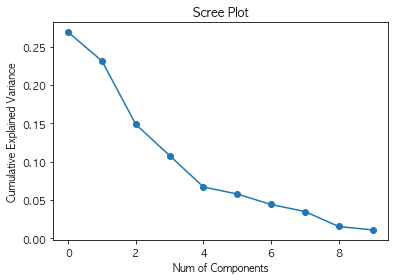

In [ ]:
plt.title('Scree Plot')
plt.xlabel('Num of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')

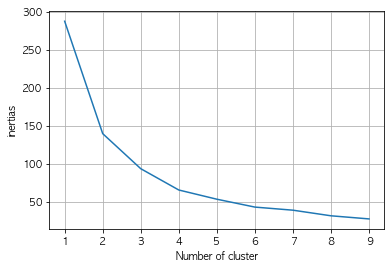

In [ ]:
inertias=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(principalDf)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.grid()
plt.plot(range(1,10),inertias)
plt.xlabel("Number of cluster")
plt.ylabel("inertias")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=k).fit(principalDf)

# 개인적인 의문 - PCA와 Clustering으로 장르에 대한 클러스터링이 가능할까
Categorical Features 의 One-Hot Encoding And PCA and K-Means Clustering

[onehot-pca 관련링크](https://stats.stackexchange.com/questions/5774/can-principal-component-analysis-be-applied-to-datasets-containing-a-mix-of-cont/5777#5777)

결과. 이 데이터는 불가능하다.
90% 이상의 데이터가 세계판매량 1.25 이하에 있다.   
닌텐도의 히트작은 세계판매량 80까지 치솟는게 있으므로, 상당한 **이상치**에 속한다고 볼 수 있다. 

PCA에서 이상치에 효과적인 RobustScaler를 사용하여, 차원을 낮춰도, 


In [ ]:
dffill=dfraw.loc[:]

In [ ]:
dfup10p=dffill[dffill.Total_Sales>1.23]
# dffill[dffill.Total_Sales>0.61] # 3300개
df90p=dffill[dffill.Total_Sales<1.23] # 1600개
# dffill[dffill.Total_Sales>25] # 10개
# sns.histplot(data=dffill[dffill.Total_Sales<1.25] ,x='Total_Sales')

In [ ]:
# len(dfraw.Genre.unique()) , len(dfraw.Publisher.unique()), len(dfraw.Platform.unique())
print(f'장르 개수 : {len(dfraw.Genre.unique())}\n회사 개수 : {len(dfraw.Publisher.unique())}\n플랫폼 개수 : {len(dfraw.Platform.unique())}')

장르 개수 : 12
회사 개수 : 578
플랫폼 개수 : 31


In [ ]:
features = ['Platform','Genre']
dfup10p

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
25,Injustice: Gods Among Us,PS3,2013.0,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25
108,Madden NFL 2001,PS2,2000.0,Sports,Electronic Arts,1.19,0.07,0.05,0.20,1.51
123,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.91,2.38,0.13,0.90,9.32
127,Mortal Kombat,PS3,2011.0,Fighting,Warner Bros. Interactive Entertainment,1.98,0.55,0.00,0.32,2.85
150,Yu-Gi-Oh! The Sacred Cards,GBA,2002.0,Role-Playing,Konami Digital Entertainment,0.94,0.35,0.00,0.02,1.31
...,...,...,...,...,...,...,...,...,...,...
16553,Left 4 Dead,X360,2008.0,Shooter,Electronic Arts,2.66,0.50,0.05,0.30,3.51
16574,Finding Nemo,PS2,2003.0,Action,THQ,1.26,0.60,0.05,0.18,2.09
16584,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009.0,Action,Activision,0.91,0.39,0.00,0.13,1.43
16588,Need for Speed Underground 2,XB,2004.0,Action,Electronic Arts,1.38,0.80,0.00,0.10,2.28


In [ ]:
dffill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16594 entries, 1 to 16598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16594 non-null  object 
 1   Platform     16594 non-null  object 
 2   Year         16594 non-null  float64
 3   Genre        16594 non-null  object 
 4   Publisher    16594 non-null  object 
 5   NA_Sales     16594 non-null  float64
 6   EU_Sales     16594 non-null  float64
 7   JP_Sales     16594 non-null  float64
 8   Other_Sales  16594 non-null  float64
 9   Total_Sales  16594 non-null  float64
dtypes: float64(6), object(4)
memory usage: 2.0+ MB


In [ ]:
# tmp = dffill.drop(['Name','Genre'], axis=1)
dfohe = pd.get_dummies(dfup10p, columns=features)
dfohe

,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Platform_2600,Platform_3DS,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
25,Injustice: Gods Among Us,2013.0,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23,1.25,0,0,...,1,0,0,0,0,0,0,0,0,0
108,Madden NFL 2001,2000.0,Electronic Arts,1.19,0.07,0.05,0.20,1.51,0,0,...,0,0,0,0,0,0,0,0,1,0
123,Call of Duty 4: Modern Warfare,2007.0,Activision,5.91,2.38,0.13,0.90,9.32,0,0,...,0,0,0,0,0,0,1,0,0,0
127,Mortal Kombat,2011.0,Warner Bros. Interactive Entertainment,1.98,0.55,0.00,0.32,2.85,0,0,...,1,0,0,0,0,0,0,0,0,0
150,Yu-Gi-Oh! The Sacred Cards,2002.0,Konami Digital Entertainment,0.94,0.35,0.00,0.02,1.31,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16553,Left 4 Dead,2008.0,Electronic Arts,2.66,0.50,0.05,0.30,3.51,0,0,...,0,0,0,0,0,0,1,0,0,0
16574,Finding Nemo,2003.0,THQ,1.26,0.60,0.05,0.18,2.09,0,0,...,0,0,0,0,0,0,0,0,0,0
16584,LEGO Indiana Jones 2: The Adventure Continues,2009.0,Activision,0.91,0.39,0.00,0.13,1.43,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,Need for Speed Underground 2,2004.0,Electronic Arts,1.38,0.80,0.00,0.10,2.28,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

x=dfohe.drop(['Name','Publisher'], axis=1).values
x = RobustScaler().fit_transform(x)
# x = StandardScaler().fit_transform(x)
ncomp=10
pca = PCA(n_components=ncomp, random_state=2021)
principalComponents=pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = [f'pc{i+1}' for i in range(ncomp) ] ) 
# principalComponents
pd.DataFrame(principalComponents)

,0,1,2,3,4,5,6,7,8,9
0,-1.756975,0.812462,0.282515,-0.404093,0.699931,-0.120921,0.265037,-0.136784,-0.045299,0.709763
1,-1.627124,0.354883,-0.204892,0.856092,-0.424596,-0.472492,-1.013760,-0.015391,-0.310145,0.113904
2,5.644225,1.774454,-2.079060,0.746352,0.483130,-0.259345,0.547297,0.462557,-0.552869,-0.507405
3,-0.385154,0.877285,-0.530140,0.314236,0.756269,-0.101693,0.263480,-0.167127,-0.030411,0.756427
4,-2.047601,-0.012049,-0.573540,0.104216,-0.196055,-0.146970,0.260673,-0.017966,0.218333,0.074229
...,...,...,...,...,...,...,...,...,...,...
1593,0.105610,0.630424,-1.086586,0.724612,0.752001,-0.274438,0.535254,0.473251,-0.590319,-0.528176
1594,-1.177840,0.402523,-0.387640,0.174644,-0.237178,0.740173,-0.752287,0.507432,0.025234,0.107688
1595,-1.776138,0.470682,-0.292351,-0.098090,0.483395,0.724024,-0.180742,-0.305746,0.281811,-0.047324
1596,-1.151870,0.292426,-0.793653,-0.189277,-0.117772,0.827394,-0.072822,-0.052177,-0.028224,0.018479


In [ ]:
# for i in [10, 20, 30, 40, 50, 100]:
#     print(i, " : ", pca.explained_variance_ratio_[:i].sum())
pca.explained_variance_ratio_[:2].sum()

0.7813250551425461

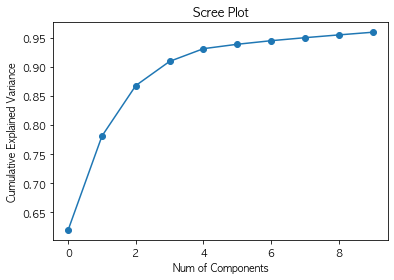

In [ ]:
plt.title('Scree Plot')
plt.xlabel('Num of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_.cumsum(), 'o-')

In [ ]:
x = RobustScaler().fit_transform(x)
# x = StandardScaler().fit_transform(x)
ncomp=3
pca = PCA(n_components=ncomp, random_state=2021)
principalComponents=pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = [f'pc{i+1}' for i in range(ncomp) ] ) 
# principalComponents
pd.DataFrame(principalComponents)

,0,1,2
0,-1.756975,0.812462,0.282515
1,-1.627124,0.354883,-0.204892
2,5.644225,1.774454,-2.079060
3,-0.385154,0.877285,-0.530140
4,-2.047601,-0.012049,-0.573540
...,...,...,...
1593,0.105610,0.630424,-1.086586
1594,-1.177840,0.402523,-0.387640
1595,-1.776138,0.470682,-0.292351
1596,-1.151870,0.292426,-0.793653


In [ ]:
pca.explained_variance_ratio_.sum()

0.8680578646386258

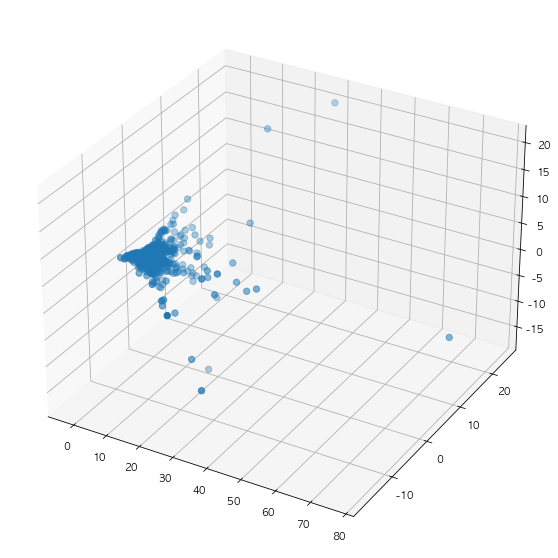

In [ ]:
from mpl_toolkits import mplot3d
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection='3d')
pca_x=principalComponents
sctt = ax.scatter3D(pca_x[:,0],pca_x[:,1],pca_x[:,2], s=40)

In [ ]:
ncomp=2
pca = PCA(n_components=ncomp, random_state=2021)
principalComponents=pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns = [f'pc{i+1}' for i in range(ncomp) ] ) 
# principalComponents
principalDf

,pc1,pc2
0,-1.756975,0.812462
1,-1.627124,0.354883
2,5.644225,1.774454
3,-0.385154,0.877285
4,-2.047601,-0.012049
...,...,...
1593,0.105610,0.630424
1594,-1.177840,0.402523
1595,-1.776138,0.470682
1596,-1.151870,0.292426


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

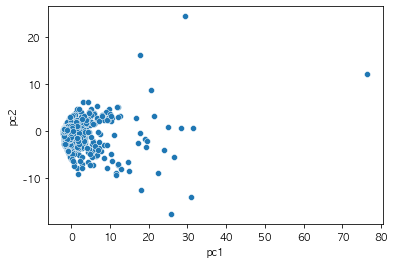

In [ ]:
sns.scatterplot(data=principalDf,x='pc1',y='pc2')

In [ ]:
finalDf=pd.concat([dfohe[['Name','Publisher','Total_Sales']].reset_index(drop=True), principalDf], axis=1)
finalDf

,Name,Publisher,Total_Sales,pc1,pc2
0,Injustice: Gods Among Us,Warner Bros. Interactive Entertainment,1.25,-1.756975,0.812462
1,Madden NFL 2001,Electronic Arts,1.51,-1.627124,0.354883
2,Call of Duty 4: Modern Warfare,Activision,9.32,5.644225,1.774454
3,Mortal Kombat,Warner Bros. Interactive Entertainment,2.85,-0.385154,0.877285
4,Yu-Gi-Oh! The Sacred Cards,Konami Digital Entertainment,1.31,-2.047601,-0.012049
...,...,...,...,...,...
1593,Left 4 Dead,Electronic Arts,3.51,0.105610,0.630424
1594,Finding Nemo,THQ,2.09,-1.177840,0.402523
1595,LEGO Indiana Jones 2: The Adventure Continues,Activision,1.43,-1.776138,0.470682
1596,Need for Speed Underground 2,Electronic Arts,2.28,-1.151870,0.292426


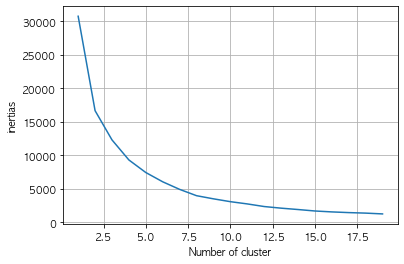

In [ ]:
inertias=[]
ran=20
for k in range(1,ran):
    kmeans = KMeans(n_clusters=k).fit(finalDf[['pc1','pc2']])
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.grid()
plt.plot(range(1,ran),inertias)
plt.xlabel("Number of cluster")
plt.ylabel("inertias")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(finalDf[['pc1','pc2']])
AfterClusterDf=finalDf.loc[:]
AfterClusterDf['cluster']=kmeans.labels_
AfterClusterDf 

,Name,Publisher,Total_Sales,pc1,pc2,cluster
0,Injustice: Gods Among Us,Warner Bros. Interactive Entertainment,1.25,-1.756975,0.812462,0
1,Madden NFL 2001,Electronic Arts,1.51,-1.627124,0.354883,0
2,Call of Duty 4: Modern Warfare,Activision,9.32,5.644225,1.774454,3
3,Mortal Kombat,Warner Bros. Interactive Entertainment,2.85,-0.385154,0.877285,0
4,Yu-Gi-Oh! The Sacred Cards,Konami Digital Entertainment,1.31,-2.047601,-0.012049,0
...,...,...,...,...,...,...
1593,Left 4 Dead,Electronic Arts,3.51,0.105610,0.630424,0
1594,Finding Nemo,THQ,2.09,-1.177840,0.402523,0
1595,LEGO Indiana Jones 2: The Adventure Continues,Activision,1.43,-1.776138,0.470682,0
1596,Need for Speed Underground 2,Electronic Arts,2.28,-1.151870,0.292426,0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

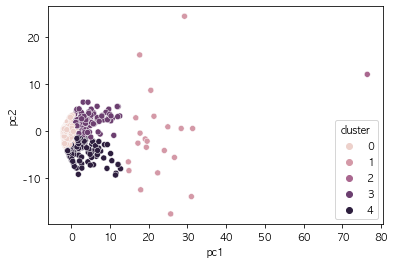

In [ ]:
sns.scatterplot(data=AfterClusterDf, x='pc1',y='pc2',hue='cluster')

In [ ]:
AfterClusterDf

,Name,Publisher,Total_Sales,pc1,pc2,cluster
0,Injustice: Gods Among Us,Warner Bros. Interactive Entertainment,1.25,-1.756975,0.812462,0
1,Madden NFL 2001,Electronic Arts,1.51,-1.627124,0.354883,0
2,Call of Duty 4: Modern Warfare,Activision,9.32,5.644225,1.774454,3
3,Mortal Kombat,Warner Bros. Interactive Entertainment,2.85,-0.385154,0.877285,0
4,Yu-Gi-Oh! The Sacred Cards,Konami Digital Entertainment,1.31,-2.047601,-0.012049,0
...,...,...,...,...,...,...
1593,Left 4 Dead,Electronic Arts,3.51,0.105610,0.630424,0
1594,Finding Nemo,THQ,2.09,-1.177840,0.402523,0
1595,LEGO Indiana Jones 2: The Adventure Continues,Activision,1.43,-1.776138,0.470682,0
1596,Need for Speed Underground 2,Electronic Arts,2.28,-1.151870,0.292426,0


In [ ]:
# AfterClusterDf.query('cluster==5').sort_values('Total_Sales', ascending=False).head(20)
AfterClusterDf.query('cluster==0').sort_values('Total_Sales', ascending=False).head(20)

In [ ]:
merged_CluterDF=AfterClusterDf.loc[:].merge(dfup10p[['Platform','Genre']].reset_index(drop=True),left_index=True, right_index=True, how='inner')
merged_CluterDF

,Name,Publisher,Total_Sales,pc1,pc2,cluster,Platform,Genre
0,Injustice: Gods Among Us,Warner Bros. Interactive Entertainment,1.25,-1.756975,0.812462,0,PS3,Fighting
1,Madden NFL 2001,Electronic Arts,1.51,-1.627124,0.354883,0,PS2,Sports
2,Call of Duty 4: Modern Warfare,Activision,9.32,5.644225,1.774454,3,X360,Shooter
3,Mortal Kombat,Warner Bros. Interactive Entertainment,2.85,-0.385154,0.877285,0,PS3,Fighting
4,Yu-Gi-Oh! The Sacred Cards,Konami Digital Entertainment,1.31,-2.047601,-0.012049,0,GBA,Role-Playing
...,...,...,...,...,...,...,...,...
1593,Left 4 Dead,Electronic Arts,3.51,0.105610,0.630424,0,X360,Shooter
1594,Finding Nemo,THQ,2.09,-1.177840,0.402523,0,PS2,Action
1595,LEGO Indiana Jones 2: The Adventure Continues,Activision,1.43,-1.776138,0.470682,0,Wii,Action
1596,Need for Speed Underground 2,Electronic Arts,2.28,-1.151870,0.292426,0,XB,Action


In [ ]:
# AfterClusterDf.reset_index(drop=True)['Platform'] = dffill.reset_index(drop=True).Platform
merged_CluterDF.query('cluster==0')#.Platform.unique()

,Name,Publisher,Total_Sales,pc1,pc2,cluster,Platform,Genre
0,Injustice: Gods Among Us,Warner Bros. Interactive Entertainment,1.25,-1.756975,0.812462,0,PS3,Fighting
1,Madden NFL 2001,Electronic Arts,1.51,-1.627124,0.354883,0,PS2,Sports
3,Mortal Kombat,Warner Bros. Interactive Entertainment,2.85,-0.385154,0.877285,0,PS3,Fighting
4,Yu-Gi-Oh! The Sacred Cards,Konami Digital Entertainment,1.31,-2.047601,-0.012049,0,GBA,Role-Playing
5,Gegege no Kitarou 2: Youkai Gundan no Chousen,Namco Bandai Games,1.25,-1.849483,-2.673147,0,NES,Role-Playing
...,...,...,...,...,...,...,...,...
1593,Left 4 Dead,Electronic Arts,3.51,0.105610,0.630424,0,X360,Shooter
1594,Finding Nemo,THQ,2.09,-1.177840,0.402523,0,PS2,Action
1595,LEGO Indiana Jones 2: The Adventure Continues,Activision,1.43,-1.776138,0.470682,0,Wii,Action
1596,Need for Speed Underground 2,Electronic Arts,2.28,-1.151870,0.292426,0,XB,Action


<AxesSubplot:xlabel='cluster', ylabel='Total_Sales'>

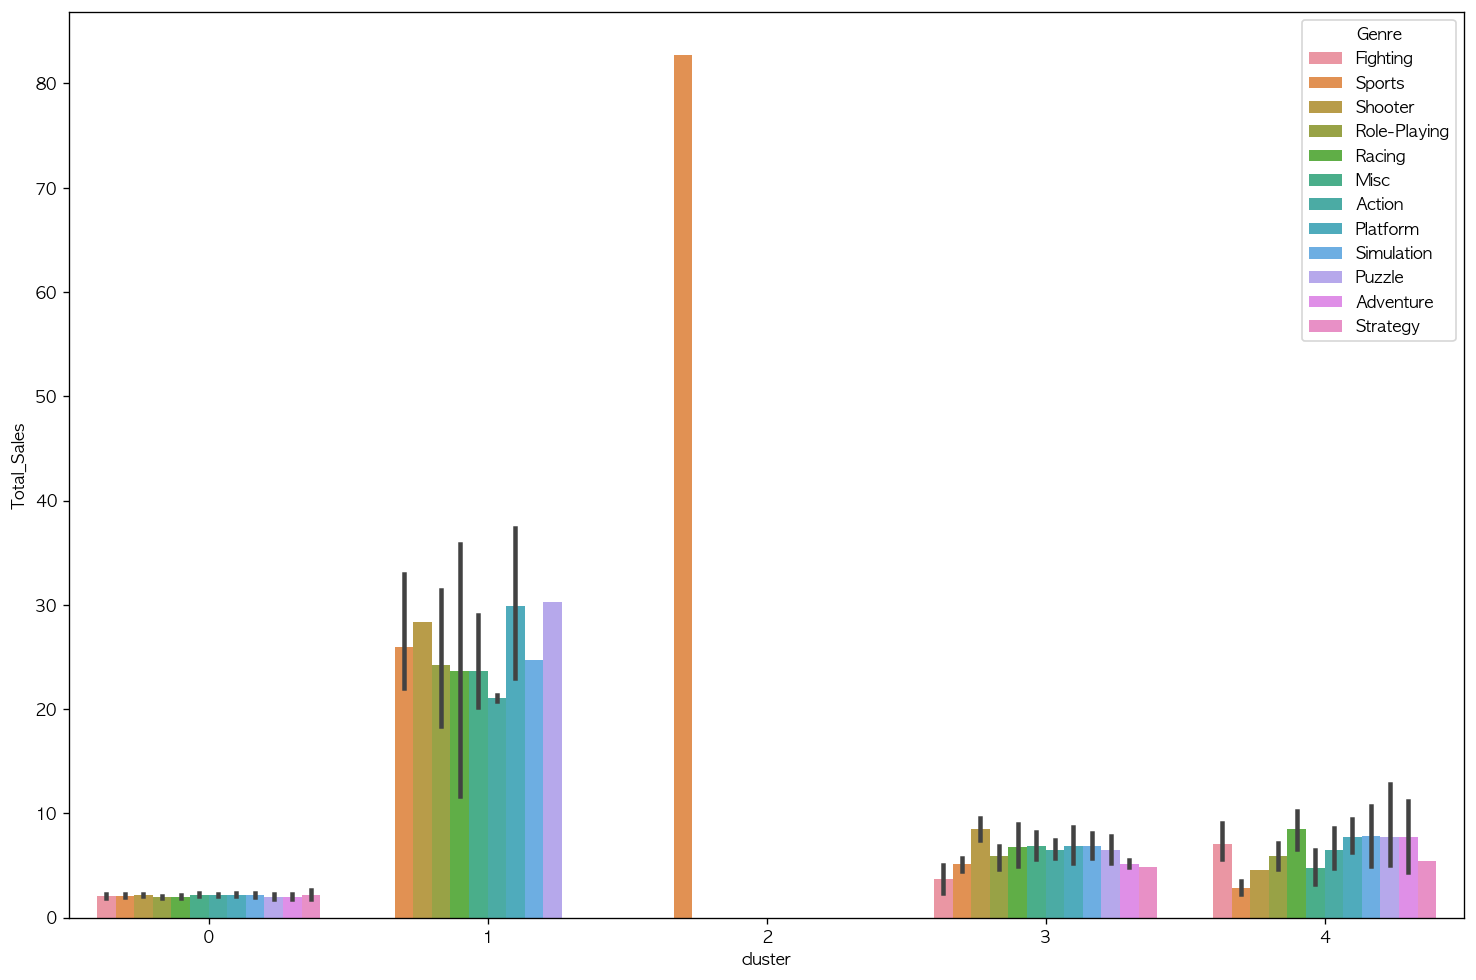

In [ ]:
plt.figure(figsize=(15,10), dpi=120)
sns.barplot(data=merged_CluterDF, x='cluster',y='Total_Sales', hue='Genre')

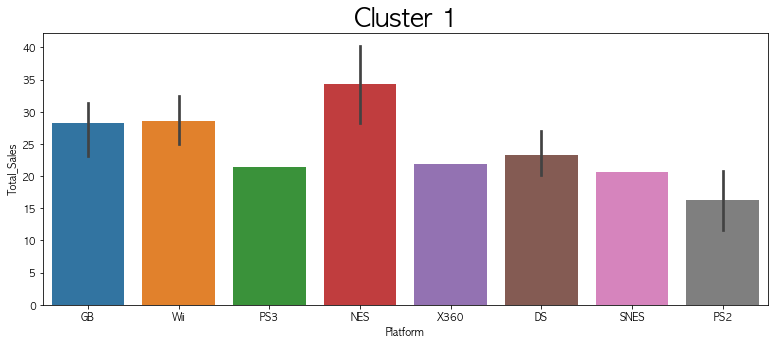

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Cluster 1", fontsize=25)
sns.barplot(data=merged_CluterDF[merged_CluterDF.cluster==1],x='Platform', y='Total_Sales')
plt.show()

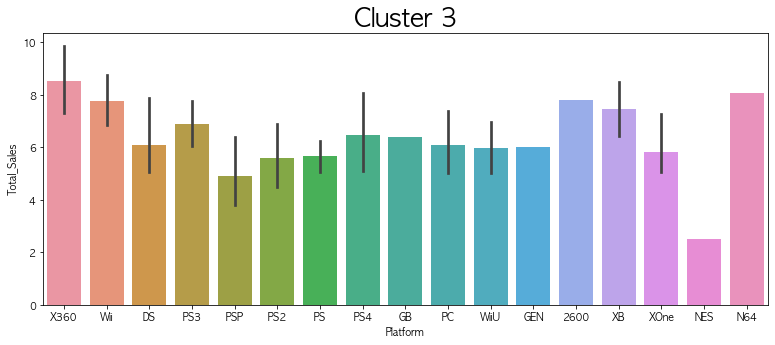

In [ ]:
plt.figure(figsize=(13,5))
plt.title("Cluster 3", fontsize=25)
sns.barplot(data=merged_CluterDF[merged_CluterDF.cluster==3],x='Platform', y='Total_Sales')
plt.show()

# 베이지안 사용이 가능할까??

## 데이터

In [36]:
# dffill.reset_index(drop=True,inplace=True)
dffill

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16318,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16319,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16320,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16321,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


array([<AxesSubplot:ylabel='0'>], dtype=object)

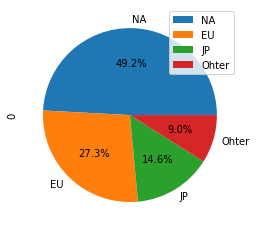

In [70]:
tmp=list((dffill.NA_Sales.sum(),dffill.EU_Sales.sum(),dffill.JP_Sales.sum(),dffill.Other_Sales.sum()))
tmpdf=pd.DataFrame(tmp, index=['NA','EU','JP','Ohter'])
tmpdf.plot.pie(autopct='%.1f%%', subplots=True)

북미지역이 50%에 가까운 전체 시장 점유율을 보이므로, 북미에 한정하여, 베이지안을 활용해보자  
기본적으로 북미의 데이터만 갖고 분석해보겠다  
$P(H)$ : 어떤 장르든 성공할 확률  
$P(D)$ : 장르가 액션일 확률  
$P(H|D)$ : 액션을 발매했을 때 성공할 확률  
$P(D|H)$ : 어떤게임이 성공했을 때 액션이었을 확률  

$P(H|D) = $ $ P(D|H)*P(H) \over {P(D|H)*P(H) + P(D|H^c)*P(H^c)}$  
어떤 게임의 성공기준을 북미지역 매출액 상위 10%라고 가정하자.


In [92]:
dfnas=dffill.pivot_table(index='Name',values='NA_Sales', aggfunc='sum').sort_values(by='NA_Sales',ascending=False)
dfnas

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
...,...
Pony Friends,0.00
Dragon Ball Z: Ultime Menace,0.00
Policenauts,0.00


In [112]:
dfnas=pd.merge(dfnas,dffill[['Name','Genre']],on='Name',how='inner').drop_duplicates('Name', keep='first').reset_index(drop=True)
dfnas

,Name,NA_Sales,Genre
0,Wii Sports,41.49,Sports
1,Super Mario Bros.,32.48,Platform
2,Duck Hunt,26.93,Shooter
3,Tetris,26.17,Puzzle
4,Grand Theft Auto V,23.46,Action
...,...,...,...
11352,Pony Friends,0.00,Simulation
11353,Dragon Ball Z: Ultime Menace,0.00,Fighting
11354,Policenauts,0.00,Adventure
11355,Dragon Ball: Daimaou Fukkatsu,0.00,Role-Playing


In [132]:
topSaleList=dfnas.iloc[:1136].Name.to_list()
downSaleList=dfnas.iloc[1136:].Name.to_list()

In [140]:
def tmpfc(x):
    if x['Name'] in downSaleList and x['Genre']=="Action":
        return 1
    else:
        return 0
dfnas.apply(lambda x: tmpfc(x), axis=1).sum()

1675

In [121]:
dfnas.groupby('Genre').count()

,Name,NA_Sales
Genre,,
Action,1925,1925
Adventure,1036,1036
Fighting,604,604
Misc,1309,1309
Platform,579,579
Puzzle,488,488
Racing,757,757
Role-Playing,1200,1200
Shooter,806,806


In [128]:
dfnas.iloc[:1136].groupby('Genre').count()

,Name,NA_Sales
Genre,,
Action,250,250
Adventure,18,18
Fighting,71,71
Misc,93,93
Platform,119,119
Puzzle,22,22
Racing,95,95
Role-Playing,75,75
Shooter,137,137


In [141]:
#topSaleList #상위10% 매출액을 기록한 게임 리스트
total=11357
count_of_genre_action=1925
p_h = 0.1
p_hc = 0.9
p_g=count_of_genre_action/total
p_gc= 1-p_g
p_d1h=250/1136
p_d1hc=1675/(11357-1675)
# p_d1hc=
# (p_d1h*p_h)/((p_d1h*p_h) + p_d1hc)

In [145]:
def bayesian(prob_drunk_prior, false_positive_rate, true_positive_rate):
    술마신사람 = prob_drunk_prior
    술안마신사람 = 1-술마신사람
    술마시고걸린사람 = true_positive_rate # TPR
    안마시고걸린사람 = false_positive_rate # FPR   
    #검사성공률(조건부)
    분자 = 술마시고걸린사람*술마신사람 
    분모 = 분자 + (안마시고걸린사람*술안마신사람)
    return 분자/분모

bayesian

0.04778027301817414